In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel, ttest_ind

In [2]:
import rpy2

In [3]:
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
# import R's "base" package
utils = importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
from rpy2.robjects.vectors import StrVector

packnames = ['lme4', 'optimx', 'pbkrtest', 'lmerTest',
             'ggplot2', 'dplyr', 'sjPlot', 'car']

# if there is no package then install it
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [4]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjp = importr('sjPlot')
sjmisc = importr('sjmisc')
car = importr('car')
lattice = importr('lattice')

C:\Users\Dongjae Kim\AppData\Roaming\Python\Python37\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [5]:
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'
# home_dir = 'G:\.shortcut-targets-by-id\\1sYZNVBbYCrHcHjo-9xdKcA4wLnob9ZEq\\road_construction\\data\\2022_online\\R_analysis_data\\'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

In [6]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
from scipy.stats import pearsonr

pearsonr(numFullUndo, condition)

(0.31916229747935393, 4.8561096488466124e-219)

<IPython.core.display.Javascript object>


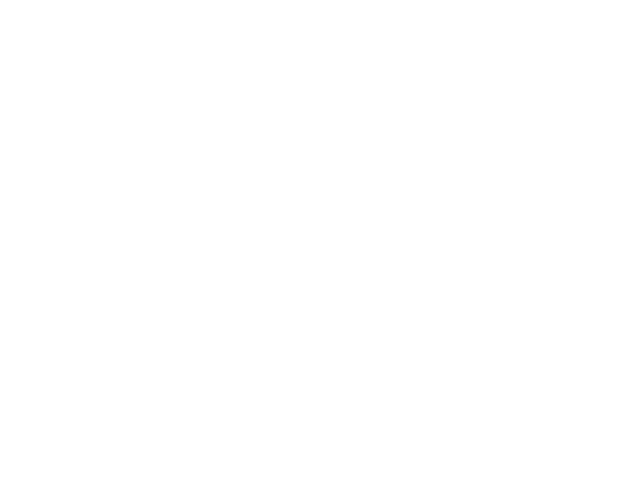

(array([4.321e+03, 0.000e+00, 3.348e+03, 0.000e+00, 1.074e+03, 0.000e+00,
        3.310e+02, 0.000e+00, 1.290e+02, 0.000e+00, 4.700e+01, 0.000e+00,
        1.400e+01, 0.000e+00, 1.700e+01, 0.000e+00, 9.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

In [8]:
%matplotlib notebook
plt.hist(num_loss,20)

<IPython.core.display.Javascript object>


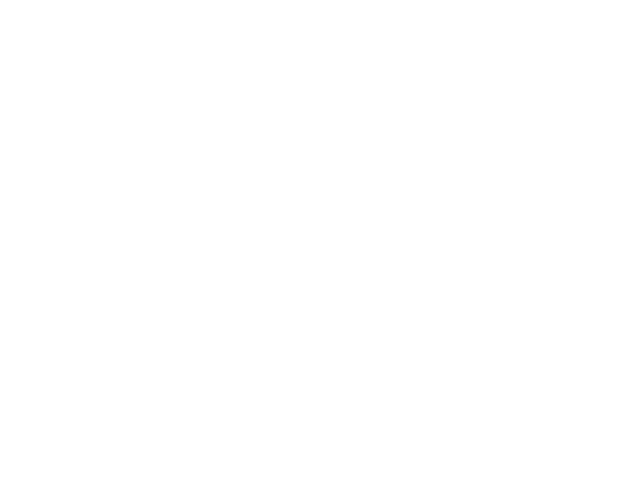

0.5837279380111925


In [9]:
# center?
%matplotlib notebook
centers = []
for si in np.unique(dat.subject):
    index = np.intersect1d(dat[dat['condition']==1].index,dat[dat['subject']==si].index)
    centers.append(dat['numFullUndo'][index].mean())
plt.hist(centers)
print(np.mean(centers))

In [10]:
np.mean(centers)
# centers

0.5837279380111925

In [11]:
# ceter only for the with undo condition
for si in np.unique(dat.subject):
    index = np.intersect1d(dat[dat['condition']==1].index,dat[dat['subject']==si].index)
    dat['numFullUndo'][index] -= dat['numFullUndo'][index].mean()
    dat['numUndo'][index] -= dat['numUndo'][index].mean()

C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
pearsonr(dat['numFullUndo'], dat['condition'])

(8.456776945386935e-18, 1.0000000000014255)

In [13]:
%%R -i dat

# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [14]:
%%R

model0 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model2)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition |  
    subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19003.0  19053.0  -9494.5  18989.0     9285 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9451 -0.6508 -0.3390  0.4729  8.5985 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.27725  0.52654      
          condition   0.00636  0.07975  0.56
 puzzleID (Intercept) 0.19581  0.44251      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.47593    0.08491  -5.605 2.08e-08 ***
condition   -0.12741    0.01551  -8.215  < 2e-16 ***
numFullUndo  0.04874    0.01872   2.604  0.00922 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effec

In [15]:
%R anova(model0,model1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model0,5.0,19017.778537,19053.463083,-9503.889269,19007.778537,NaN,NaN,NaN
model1,7.0,19020.624221,19070.582585,-9503.312111,19006.624221,1.154316,2.0,0.561492


In [16]:
%R anova(model0,model1_1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model0,5.0,19017.778537,19053.463083,-9503.889269,19007.778537,NaN,NaN,NaN
model1_1,7.0,19021.638011,19071.596374,-9503.819005,19007.638011,0.140527,2.0,0.932148


In [17]:
%R anova(model0,model2)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model0,5.0,19017.778537,19053.463083,-9503.889269,19007.778537,NaN,NaN,NaN
model2,7.0,19003.039993,19052.998357,-9494.519996,18989.039993,18.738545,2.0,0.000085


In [18]:
%R anova(model0,model2_1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model0,5.0,19017.778537,19053.463083,-9503.889269,19007.778537,NaN,NaN,NaN
model2_1,7.0,19016.923560,19066.881924,-9501.461780,19002.923560,4.854977,2.0,0.088258


In [19]:
%R anova(model2,model3)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
model2,7.0,19003.039993,19052.998357,-9494.519996,18989.039993,NaN,NaN,NaN
model3,9.0,19002.005329,19066.237511,-9492.002665,18984.005329,5.034664,2.0,0.080675


$subject

$puzzleID



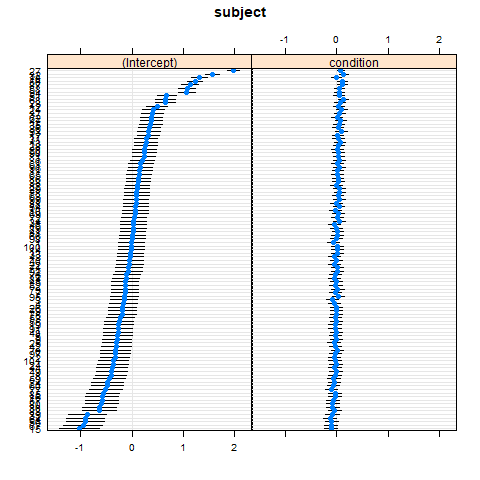

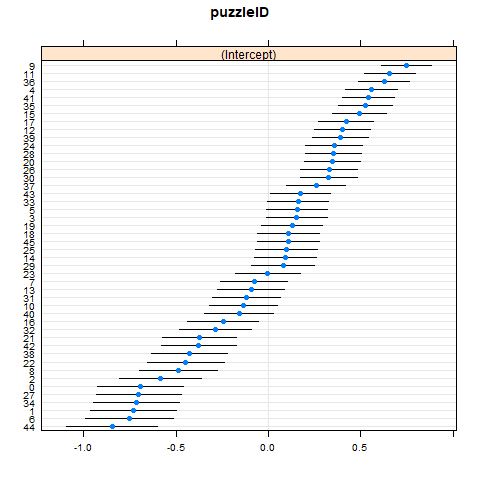

In [20]:
%%R

# theme_set(theme_sjplot())
# sjp.glmer(model2)
# plot_model(model2,type="pred",terms="condition")
# plot_model(model2,type="pred",terms="numFullUndo")
dotplot(ranef(model2,condVar=TRUE))


In [21]:
%%R

model.matrix(model1)

     (Intercept) condition numFullUndo
0              1         1  0.21739130
1              1         1  1.21739130
2              1         1 -0.78260870
3              1         1 -0.78260870
4              1         1 -0.78260870
5              1         1 -0.78260870
6              1         1  1.21739130
7              1         1  0.21739130
8              1         1 -0.78260870
9              1         1  1.21739130
10             1         1 -0.78260870
11             1         1 -0.78260870
12             1         1 -0.78260870
13             1         1 -0.78260870
14             1         1  0.21739130
15             1         1  1.21739130
16             1         1 -0.78260870
17             1         1  2.21739130
18             1         1 -0.78260870
19             1         1 -0.78260870
20             1         1 -0.78260870
21             1         1 -0.78260870
22             1         1  2.21739130
23             1        -1  0.00000000
24             1        -

209            1         1 -1.45652174
210            1         1 -0.45652174
211            1         1  0.54347826
212            1         1 -1.45652174
213            1         1 -1.45652174
214            1         1  0.54347826
215            1         1  0.54347826
216            1         1 -0.45652174
217            1         1 -2.45652174
218            1         1 -2.45652174
219            1         1  1.54347826
220            1         1  1.54347826
221            1         1 -1.45652174
222            1         1  2.54347826
223            1         1 -2.45652174
224            1         1  2.54347826
225            1         1 -2.45652174
226            1         1  0.54347826
227            1         1 -2.45652174
228            1         1  2.54347826
229            1         1  0.54347826
230            1         1  4.54347826
231            1         1  2.54347826
232            1         1 -0.45652174
233            1         1 -0.45652174
234            1         

419            1         1 -0.67391304
420            1         1  0.32608696
421            1         1  0.32608696
422            1         1  1.32608696
423            1         1  0.32608696
424            1         1 -0.67391304
425            1         1  1.32608696
426            1         1 -0.67391304
427            1         1 -0.67391304
428            1         1  0.32608696
429            1         1 -0.67391304
430            1         1  1.32608696
431            1         1  0.32608696
432            1         1  3.32608696
433            1         1  0.32608696
434            1         1  0.32608696
435            1         1 -0.67391304
436            1         1 -0.67391304
437            1        -1  0.00000000
438            1        -1  0.00000000
439            1        -1  0.00000000
440            1        -1  0.00000000
441            1        -1  0.00000000
442            1        -1  0.00000000
443            1        -1  0.00000000
444            1        -

629            1        -1  0.00000000
630            1        -1  0.00000000
631            1        -1  0.00000000
632            1        -1  0.00000000
633            1        -1  0.00000000
634            1        -1  0.00000000
635            1        -1  0.00000000
636            1        -1  0.00000000
637            1        -1  0.00000000
638            1        -1  0.00000000
639            1        -1  0.00000000
640            1        -1  0.00000000
641            1        -1  0.00000000
642            1        -1  0.00000000
643            1        -1  0.00000000
644            1        -1  0.00000000
645            1        -1  0.00000000
646            1        -1  0.00000000
647            1        -1  0.00000000
648            1        -1  0.00000000
649            1        -1  0.00000000
650            1        -1  0.00000000
651            1        -1  0.00000000
652            1        -1  0.00000000
653            1        -1  0.00000000
654            1        -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 -0.23913043
1056           1         1 -0.23913043
1057           1         1  0.76086957
1058           1         1 -0.23913043
1059           1         1  0.76086957
1060           1         1 -0.23913043
1061           1         1 -0.23913043
1062           1         1 -0.23913043
1063           1         1 -0.23913043
1064           1         1 -0.23913043
1065           1         1 -0.23913043
1066           1         1 -0.23913043
1067           1         1 -0.23913043
1068           1         1 -0.23913043
1069           1         1 -0.23913043
1070           1         1 -0.23913043
1071           1         1 -0.23913043
1072           1         1 -0.23913043
1073           1         1 -0.23913043
1074           1         1 -0.23913043
1075           1         1 -0.23913043
1076           1         1 -0.23913043
1077           1         1 -0.23913043
1078           1         1 -0.23913043
1079           1         1  0.76086957
1080           1         1 -0.23913043
1081        

1265           1         1 -0.30434783
1266           1         1 -0.30434783
1267           1         1 -0.30434783
1268           1         1 -0.30434783
1269           1         1 -0.30434783
1270           1         1 -0.30434783
1271           1         1 -0.30434783
1272           1         1 -0.30434783
1273           1         1 -0.30434783
1274           1         1 -0.30434783
1275           1         1 -0.30434783
1276           1         1 -0.30434783
1277           1         1 -0.30434783
1278           1         1 -0.30434783
1279           1         1 -0.30434783
1280           1         1 -0.30434783
1281           1         1 -0.30434783
1282           1         1 -0.30434783
1283           1         1 -0.30434783
1284           1         1 -0.30434783
1285           1         1 -0.30434783
1286           1         1 -0.30434783
1287           1         1 -0.30434783
1288           1         1  4.84782609
1289           1         1  0.84782609
1290           1         

1475           1         1 -0.23913043
1476           1         1 -0.23913043
1477           1         1 -0.23913043
1478           1         1 -0.23913043
1479           1         1 -0.23913043
1480           1         1 -0.23913043
1481           1         1 -0.23913043
1482           1         1 -0.23913043
1483           1         1 -0.23913043
1484           1         1 -0.23913043
1485           1         1 -0.23913043
1486           1         1 -0.23913043
1487           1         1 -0.23913043
1488           1         1 -0.23913043
1489           1         1 -0.23913043
1490           1         1 -0.23913043
1491           1         1 -0.23913043
1492           1         1 -0.23913043
1493           1         1 -0.23913043
1494           1         1 -0.23913043
1495           1        -1  0.00000000
1496           1        -1  0.00000000
1497           1        -1  0.00000000
1498           1        -1  0.00000000
1499           1        -1  0.00000000
1500           1        -

1685           1        -1  0.00000000
1686           1        -1  0.00000000
1687           1        -1  0.00000000
1688           1        -1  0.00000000
1689           1        -1  0.00000000
1690           1        -1  0.00000000
1691           1        -1  0.00000000
1692           1        -1  0.00000000
1693           1        -1  0.00000000
1694           1        -1  0.00000000
1695           1        -1  0.00000000
1696           1        -1  0.00000000
1697           1        -1  0.00000000
1698           1        -1  0.00000000
1699           1        -1  0.00000000
1700           1        -1  0.00000000
1701           1        -1  0.00000000
1702           1        -1  0.00000000
1703           1        -1  0.00000000
1704           1        -1  0.00000000
1705           1        -1  0.00000000
1706           1        -1  0.00000000
1707           1        -1  0.00000000
1708           1        -1  0.00000000
1709           1        -1  0.00000000
1710           1        -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




2115           1         1 -0.36956522
2116           1         1  2.71739130
2117           1         1 -1.28260870
2118           1         1 -1.28260870
2119           1         1 -0.28260870
2120           1         1  0.71739130
2121           1         1  0.71739130
2122           1         1 -1.28260870
2123           1         1  0.71739130
2124           1         1 -0.28260870
2125           1         1 -1.28260870
2126           1         1 -0.28260870
2127           1         1 -1.28260870
2128           1         1  0.71739130
2129           1         1 -1.28260870
2130           1         1 -1.28260870
2131           1         1 -0.28260870
2132           1         1 -1.28260870
2133           1         1  0.71739130
2134           1         1  1.71739130
2135           1         1  0.71739130
2136           1         1 -1.28260870
2137           1         1 -1.28260870
2138           1         1  0.71739130
2139           1        -1  0.00000000
2140           1        

2325           1        -1  0.00000000
2326           1        -1  0.00000000
2327           1        -1  0.00000000
2328           1        -1  0.00000000
2329           1        -1  0.00000000
2330           1        -1  0.00000000
2331           1        -1  0.00000000
2332           1        -1  0.00000000
2333           1        -1  0.00000000
2334           1        -1  0.00000000
2335           1        -1  0.00000000
2336           1        -1  0.00000000
2337           1        -1  0.00000000
2338           1        -1  0.00000000
2339           1        -1  0.00000000
2340           1        -1  0.00000000
2341           1        -1  0.00000000
2342           1        -1  0.00000000
2343           1        -1  0.00000000
2344           1        -1  0.00000000
2345           1        -1  0.00000000
2346           1        -1  0.00000000
2347           1        -1  0.00000000
2348           1        -1  0.00000000
2349           1        -1  0.00000000
2350           1        -

2535           1         1 -0.02173913
2536           1         1 -0.02173913
2537           1         1 -0.02173913
2538           1         1 -0.02173913
2539           1         1 -0.02173913
2540           1         1 -0.02173913
2541           1         1 -0.02173913
2542           1         1 -0.02173913
2543           1         1 -0.02173913
2544           1         1 -0.02173913
2545           1         1 -0.02173913
2546           1         1 -0.02173913
2547           1         1 -0.02173913
2548           1         1 -0.02173913
2549           1         1 -0.02173913
2550           1         1 -0.02173913
2551           1         1 -0.02173913
2552           1         1 -0.02173913
2553           1        -1  0.00000000
2554           1        -1  0.00000000
2555           1        -1  0.00000000
2556           1        -1  0.00000000
2557           1        -1  0.00000000
2558           1        -1  0.00000000
2559           1        -1  0.00000000
2560           1        -

2745           1        -1  0.00000000
2746           1        -1  0.00000000
2747           1        -1  0.00000000
2748           1        -1  0.00000000
2749           1        -1  0.00000000
2750           1        -1  0.00000000
2751           1        -1  0.00000000
2752           1        -1  0.00000000
2753           1        -1  0.00000000
2754           1        -1  0.00000000
2755           1        -1  0.00000000
2756           1        -1  0.00000000
2757           1        -1  0.00000000
2758           1        -1  0.00000000
2759           1        -1  0.00000000
2760           1        -1  0.00000000
2761           1        -1  0.00000000
2762           1        -1  0.00000000
2763           1        -1  0.00000000
2764           1        -1  0.00000000
2765           1        -1  0.00000000
2766           1        -1  0.00000000
2767           1        -1  0.00000000
2768           1        -1  0.00000000
2769           1        -1  0.00000000
2770           1        -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        -1  0.00000000
3178           1        -1  0.00000000
3179           1        -1  0.00000000
3180           1        -1  0.00000000
3181           1        -1  0.00000000
3182           1        -1  0.00000000
3183           1        -1  0.00000000
3184           1        -1  0.00000000
3185           1        -1  0.00000000
3186           1        -1  0.00000000
3187           1        -1  0.00000000
3188           1        -1  0.00000000
3189           1        -1  0.00000000
3190           1        -1  0.00000000
3191           1        -1  0.00000000
3192           1        -1  0.00000000
3193           1        -1  0.00000000
3194           1        -1  0.00000000
3195           1        -1  0.00000000
3196           1        -1  0.00000000
3197           1         1 -0.08695652
3198           1         1 -0.08695652
3199           1         1  0.91304348
3200           1         1 -0.08695652
3201           1         1 -0.08695652
3202           1         1 -0.08695652
32

3387           1         1 -0.13043478
3388           1         1 -0.13043478
3389           1         1 -0.13043478
3390           1         1 -0.13043478
3391           1         1 -0.13043478
3392           1         1 -0.13043478
3393           1         1 -0.13043478
3394           1         1 -0.13043478
3395           1         1 -0.13043478
3396           1         1 -0.13043478
3397           1         1 -0.13043478
3398           1         1 -0.13043478
3399           1         1 -0.13043478
3400           1         1 -0.13043478
3401           1         1 -0.13043478
3402           1         1 -0.13043478
3403           1         1 -0.13043478
3404           1         1 -0.34782609
3405           1         1 -0.34782609
3406           1         1  1.65217391
3407           1         1 -0.34782609
3408           1         1 -0.34782609
3409           1         1  4.65217391
3410           1         1  0.65217391
3411           1         1 -0.34782609
3412           1         

3597           1        -1  0.00000000
3598           1        -1  0.00000000
3599           1        -1  0.00000000
3600           1        -1  0.00000000
3601           1        -1  0.00000000
3602           1        -1  0.00000000
3603           1        -1  0.00000000
3604           1        -1  0.00000000
3605           1        -1  0.00000000
3606           1        -1  0.00000000
3607           1        -1  0.00000000
3608           1        -1  0.00000000
3609           1        -1  0.00000000
3610           1        -1  0.00000000
3611           1         1  0.41304348
3612           1         1 -0.58695652
3613           1         1 -0.58695652
3614           1         1 -0.58695652
3615           1         1 -0.58695652
3616           1         1  0.41304348
3617           1         1  0.41304348
3618           1         1 -0.58695652
3619           1         1 -0.58695652
3620           1         1 -0.58695652
3621           1         1 -0.58695652
3622           1         

3807           1         1  0.54347826
3808           1         1  2.54347826
3809           1         1 -0.45652174
3810           1         1  0.54347826
3811           1         1  0.54347826
3812           1         1  1.54347826
3813           1         1 -0.45652174
3814           1         1  0.54347826
3815           1         1 -0.45652174
3816           1         1 -0.45652174
3817           1         1  0.54347826
3818           1         1 -0.45652174
3819           1         1  1.54347826
3820           1         1 -0.45652174
3821           1         1 -0.45652174
3822           1         1 -0.45652174
3823           1         1 -0.45652174
3824           1         1 -0.45652174
3825           1         1  0.54347826
3826           1         1 -0.45652174
3827           1         1 -0.45652174
3828           1         1 -0.45652174
3829           1         1 -0.45652174
3830           1         1 -0.45652174
3831           1         1 -0.45652174
3832           1         

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



           1        -1  0.00000000
4477           1        -1  0.00000000
4478           1        -1  0.00000000
4479           1        -1  0.00000000
4480           1        -1  0.00000000
4481           1        -1  0.00000000
4482           1        -1  0.00000000
4483           1        -1  0.00000000
4484           1        -1  0.00000000
4485           1         1 -0.56521739
4486           1         1 -0.56521739
4487           1         1  2.43478261
4488           1         1 -0.56521739
4489           1         1  2.43478261
4490           1         1 -0.56521739
4491           1         1  0.43478261
4492           1         1  0.43478261
4493           1         1  1.43478261
4494           1         1 -0.56521739
4495           1         1  0.43478261
4496           1         1 -0.56521739
4497           1         1 -0.56521739
4498           1         1 -0.56521739
4499           1         1 -0.56521739
4500           1         1 -0.56521739
4501           1         1  0

4686           1         1 -0.04347826
4687           1         1 -0.04347826
4688           1         1 -0.04347826
4689           1         1 -0.04347826
4690           1         1 -0.04347826
4691           1         1 -0.04347826
4692           1         1 -0.10869565
4693           1         1 -0.10869565
4694           1         1 -0.10869565
4695           1         1 -0.10869565
4696           1         1 -0.10869565
4697           1         1 -0.10869565
4698           1         1 -0.10869565
4699           1         1  2.89130435
4700           1         1 -0.10869565
4701           1         1 -0.10869565
4702           1         1 -0.10869565
4703           1         1 -0.10869565
4704           1         1  0.89130435
4705           1         1 -0.10869565
4706           1         1 -0.10869565
4707           1         1 -0.10869565
4708           1         1 -0.10869565
4709           1         1 -0.10869565
4710           1         1 -0.10869565
4711           1         

4896           1         1  0.00000000
4897           1         1  0.00000000
4898           1         1  0.00000000
4899           1        -1  0.00000000
4900           1        -1  0.00000000
4901           1        -1  0.00000000
4902           1        -1  0.00000000
4903           1        -1  0.00000000
4904           1        -1  0.00000000
4905           1        -1  0.00000000
4906           1        -1  0.00000000
4907           1        -1  0.00000000
4908           1        -1  0.00000000
4909           1        -1  0.00000000
4910           1        -1  0.00000000
4911           1        -1  0.00000000
4912           1        -1  0.00000000
4913           1        -1  0.00000000
4914           1        -1  0.00000000
4915           1        -1  0.00000000
4916           1        -1  0.00000000
4917           1        -1  0.00000000
4918           1        -1  0.00000000
4919           1        -1  0.00000000
4920           1        -1  0.00000000
4921           1        -

5106           1        -1  0.00000000
5107           1        -1  0.00000000
5108           1        -1  0.00000000
5109           1        -1  0.00000000
5110           1        -1  0.00000000
5111           1        -1  0.00000000
5112           1        -1  0.00000000
5113           1        -1  0.00000000
5114           1        -1  0.00000000
5115           1        -1  0.00000000
5116           1        -1  0.00000000
5117           1        -1  0.00000000
5118           1        -1  0.00000000
5119           1        -1  0.00000000
5120           1        -1  0.00000000
5121           1        -1  0.00000000
5122           1        -1  0.00000000
5123           1        -1  0.00000000
5124           1        -1  0.00000000
5125           1        -1  0.00000000
5126           1        -1  0.00000000
5127           1        -1  0.00000000
5128           1        -1  0.00000000
5129           1         1 -1.19565217
5130           1         1 -0.19565217
5131           1         

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        -1  0.00000000
5895           1        -1  0.00000000
5896           1        -1  0.00000000
5897           1        -1  0.00000000
5898           1        -1  0.00000000
5899           1        -1  0.00000000
5900           1        -1  0.00000000
5901           1        -1  0.00000000
5902           1        -1  0.00000000
5903           1        -1  0.00000000
5904           1        -1  0.00000000
5905           1        -1  0.00000000
5906           1        -1  0.00000000
5907           1        -1  0.00000000
5908           1        -1  0.00000000
5909           1        -1  0.00000000
5910           1        -1  0.00000000
5911           1         1 -0.84782609
5912           1         1 -0.84782609
5913           1         1  1.15217391
5914           1         1  0.15217391
5915           1         1 -0.84782609
5916           1         1  0.15217391
5917           1         1 -0.84782609
5918           1         1  1.15217391
5919           1         1  0.15217391
59

6104           1        -1  0.00000000
6105           1        -1  0.00000000
6106           1        -1  0.00000000
6107           1        -1  0.00000000
6108           1        -1  0.00000000
6109           1        -1  0.00000000
6110           1        -1  0.00000000
6111           1        -1  0.00000000
6112           1        -1  0.00000000
6113           1        -1  0.00000000
6114           1        -1  0.00000000
6115           1        -1  0.00000000
6116           1        -1  0.00000000
6117           1        -1  0.00000000
6118           1        -1  0.00000000
6119           1        -1  0.00000000
6120           1        -1  0.00000000
6121           1        -1  0.00000000
6122           1        -1  0.00000000
6123           1        -1  0.00000000
6124           1        -1  0.00000000
6125           1        -1  0.00000000
6126           1        -1  0.00000000
6127           1        -1  0.00000000
6128           1        -1  0.00000000
6129           1        -

6314           1         1  0.00000000
6315           1         1  0.00000000
6316           1         1  0.00000000
6317           1         1  0.00000000
6318           1         1  0.00000000
6319           1         1  0.00000000
6320           1         1  0.00000000
6321           1         1  0.00000000
6322           1         1  0.00000000
6323           1         1  0.00000000
6324           1         1  0.00000000
6325           1        -1  0.00000000
6326           1        -1  0.00000000
6327           1        -1  0.00000000
6328           1        -1  0.00000000
6329           1        -1  0.00000000
6330           1        -1  0.00000000
6331           1        -1  0.00000000
6332           1        -1  0.00000000
6333           1        -1  0.00000000
6334           1        -1  0.00000000
6335           1        -1  0.00000000
6336           1        -1  0.00000000
6337           1        -1  0.00000000
6338           1        -1  0.00000000
6339           1        -

6524           1        -1  0.00000000
6525           1        -1  0.00000000
6526           1        -1  0.00000000
6527           1        -1  0.00000000
6528           1        -1  0.00000000
6529           1        -1  0.00000000
6530           1        -1  0.00000000
6531           1        -1  0.00000000
6532           1         1 -0.58695652
6533           1         1  2.41304348
6534           1         1 -0.58695652
6535           1         1 -0.58695652
6536           1         1 -0.58695652
6537           1         1  3.41304348
6538           1         1 -0.58695652
6539           1         1 -0.58695652
6540           1         1 -0.58695652
6541           1         1 -0.58695652
6542           1         1 -0.58695652
6543           1         1  1.41304348
6544           1         1  0.41304348
6545           1         1  0.41304348
6546           1         1 -0.58695652
6547           1         1 -0.58695652
6548           1         1 -0.58695652
6549           1         

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  1.28260870
6919           1         1 -0.71739130
6920           1         1  0.28260870
6921           1         1 -0.71739130
6922           1         1  0.28260870
6923           1        -1  0.00000000
6924           1        -1  0.00000000
6925           1        -1  0.00000000
6926           1        -1  0.00000000
6927           1        -1  0.00000000
6928           1        -1  0.00000000
6929           1        -1  0.00000000
6930           1        -1  0.00000000
6931           1        -1  0.00000000
6932           1        -1  0.00000000
6933           1        -1  0.00000000
6934           1        -1  0.00000000
6935           1        -1  0.00000000
6936           1        -1  0.00000000
6937           1        -1  0.00000000
6938           1        -1  0.00000000
6939           1        -1  0.00000000
6940           1        -1  0.00000000
6941           1        -1  0.00000000
6942           1        -1  0.00000000
6943           1        -1  0.00000000
6944        

7128           1         1  0.00000000
7129           1         1  0.00000000
7130           1         1  0.00000000
7131           1         1  0.00000000
7132           1         1  0.00000000
7133           1         1  0.00000000
7134           1         1  0.00000000
7135           1         1  0.00000000
7136           1         1  0.00000000
7137           1         1  0.00000000
7138           1         1  0.00000000
7139           1         1  0.00000000
7140           1         1  0.00000000
7141           1         1  0.00000000
7142           1         1  0.00000000
7143           1         1  0.00000000
7144           1         1  0.00000000
7145           1         1  0.00000000
7146           1         1  0.00000000
7147           1
7404           1        -1  0.00000000
7405           1        -1  0.00000000
7406           1        -1  0.00000000
7407           1        -1  0.00000000
7408           1        -1  0.00000000
7409           1        -1  0.00000000
7410    

7594           1        -1  0.00000000
7595           1        -1  0.00000000
7596           1        -1  0.00000000
7597           1        -1  0.00000000
7598           1        -1  0.00000000
7599           1        -1  0.00000000
7600           1        -1  0.00000000
7601           1        -1  0.00000000
7602           1        -1  0.00000000
7603           1        -1  0.00000000
7604           1        -1  0.00000000
7605           1        -1  0.00000000
7606           1        -1  0.00000000
7607           1        -1  0.00000000
7608           1        -1  0.00000000
7609           1        -1  0.00000000
7610           1        -1  0.00000000
7611           1        -1  0.00000000
7612           1        -1  0.00000000
7613           1         1  0.52173913
7614           1         1 -0.47826087
7615           1         1 -0.47826087
7616           1         1 -0.47826087
7617           1         1 -0.47826087
7618           1         1 -0.47826087
7619           1         

7804           1         1 -0.41304348
7805           1         1  0.58695652
7806           1         1  1.58695652
7807           1         1 -0.41304348
7808           1         1  0.58695652
7809           1         1 -0.41304348
7810           1         1 -0.41304348
7811           1         1 -0.41304348
7812           1         1 -0.41304348
7813           1         1 -0.41304348
7814           1         1 -0.41304348
7815           1         1  1.58695652
7816           1         1 -0.41304348
7817           1         1  0.58695652
7818           1         1 -0.41304348
7819           1         1 -0.41304348
7820           1        -1  0.00000000
7821           1        -1  0.00000000
7822           1        -1  0.00000000
7823           1        -1  0.00000000
7824           1        -1  0.00000000
7825           1        -1  0.00000000
7826           1        -1  0.00000000
7827           1        -1  0.00000000
7828           1        -1  0.00000000
7829           1        -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



           1         1 -0.36956522
8177           1         1 -0.36956522
8178           1         1 -0.36956522
8179           1         1  0.63043478
8180           1         1 -0.36956522
8181           1         1 -0.36956522
8182           1         1  1.63043478
8183           1         1  1.63043478
8184           1         1 -0.36956522
8185           1         1 -0.36956522
8186           1         1  0.63043478
8187           1         1 -0.36956522
8188           1         1  0.54347826
8189           1         1  0.54347826
8190           1         1 -0.45652174
8191           1         1  0.54347826
8192           1         1 -0.45652174
8193           1         1  2.54347826
8194           1         1 -0.45652174
8195           1         1  0.54347826
8196           1         1  0.54347826
8197           1         1  1.54347826
8198           1         1  0.54347826
8199           1         1 -0.45652174
8200           1         1  0.54347826
8201           1         1  1

8386           1        -1  0.00000000
8387           1        -1  0.00000000
8388           1        -1  0.00000000
8389           1        -1  0.00000000
8390           1        -1  0.00000000
8391           1        -1  0.00000000
8392           1        -1  0.00000000
8393           1        -1  0.00000000
8394           1        -1  0.00000000
8395           1         1  0.82608696
8396           1         1 -0.17391304
8397           1         1 -0.17391304
8398           1         1 -0.17391304
8399           1         1 -0.17391304
8400           1         1 -0.17391304
8401           1         1 -0.17391304
8402           1         1 -0.17391304
8403           1         1 -0.17391304
8404           1         1 -0.17391304
8405           1         1 -0.17391304
8406           1         1 -0.17391304
8407           1         1  0.82608696
8408           1         1  0.82608696
8409           1         1 -0.17391304
8410           1         1 -0.17391304
8411           1         

8596           1         1  0.15217391
8597           1         1  0.15217391
8598           1         1 -0.84782609
8599           1         1  1.15217391
8600           1         1  0.15217391
8601           1         1 -0.84782609
8602           1         1  1.15217391
8603           1         1 -0.84782609
8604           1         1  0.15217391
8605           1         1 -0.84782609
8606           1         1  1.15217391
8607           1         1 -0.84782609
8608           1         1 -0.84782609
8609           1         1 -0.84782609
8610           1         1 -0.84782609
8611           1         1 -0.84782609
8612           1         1  0.15217391
8613           1         1  1.15217391
8614           1         1 -0.84782609
8615           1         1  0.15217391
8616           1         1 -0.84782609
8617           1         1  0.15217391
8618           1         1  2.15217391
8619           1         1  0.15217391
8620           1         1 -0.84782609
8621           1         

9072           1         1  0.00000000
9073           1         1  0.00000000
9074           1         1  0.00000000
9075           1         1  0.00000000
9076           1         1  0.00000000
9077           1         1  0.00000000
9078           1         1  0.00000000
9079           1         1  0.00000000
9080           1         1  0.00000000
9081           1         1  0.00000000
9082           1         1  0.00000000
9083           1         1  0.00000000
9084           1         1  0.00000000
9085           1        -1  0.00000000
9086           1        -1  0.00000000
9087           1        -1  0.00000000
9088           1        -1  0.00000000
9089           1        -1  0.00000000
9090           1        -1  0.00000000
9091           1        -1  0.00000000
9092           1        -1  0.00000000
9093           1        -1  0.00000000
9094           1        -1  0.00000000
9095           1        -1  0.00000000
9096           1        -1  0.00000000
9097           1        -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<IPython.core.display.Javascript object>


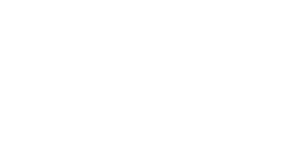

In [22]:
%matplotlib notebook

index = dat[dat['condition']==1].index
plt.scatter(dat["numFullUndo"][index], num_loss[index])

<IPython.core.display.Javascript object>


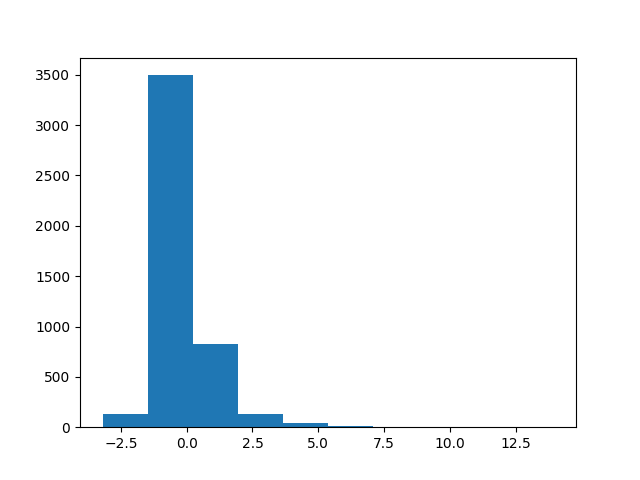

(array([1.310e+02, 3.496e+03, 8.230e+02, 1.340e+02, 4.200e+01, 1.200e+01,
        3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-3.19565217, -1.4826087 ,  0.23043478,  1.94347826,  3.65652174,
         5.36956522,  7.0826087 ,  8.79565217, 10.50869565, 12.22173913,
        13.93478261]),
 <BarContainer object of 10 artists>)

In [23]:
%matplotlib notebook

plt.hist(dat["numFullUndo"][index])

# centralize without 0

Assumption here is there is no effect of not undoing, but centralize for others. 

In [28]:
# ceter only for the with undo condition (subject wise)
for si in np.unique(dat.subject):
    index = np.intersect1d(dat[dat['condition']==1].index,dat[dat['subject']==si].index)
    index = np.intersect1d(dat[dat['numFullUndo']!=0].index, index)
    dat['numFullUndo'][index] -= dat['numFullUndo'][index].mean()
    dat['numUndo'][index] -= dat['numUndo'][index].mean()

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [43]:
%%R
model0 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model2)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition |  
    subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19004.5  19054.5  -9495.3  18990.5     9285 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9477 -0.6506 -0.3365  0.4724  8.9115 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.276931 0.52624      
          condition   0.006361 0.07976  0.56
 puzzleID (Intercept) 0.196047 0.44277      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.47565    0.08492  -5.601 2.13e-08 ***
condition   -0.12690    0.01550  -8.186 2.70e-16 ***
numFullUndo  0.06225    0.02719   2.289   0.0221 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effec

In [44]:
%%R
anova(model0, model1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 | subject)
model1: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + numFullUndo | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0    5 19019 19055 -9504.6    19009                     
model1    7 19023 19073 -9504.5    19009 0.0125  2     0.9938


In [45]:
%%R
anova(model0, model1_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 | subject)
model1_1: num_loss ~ condition + numFullUndo + (1 + numFullUndo | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0      5 19019 19055 -9504.6    19009                     
model1_1    7 19022 19072 -9504.2    19008 0.6575  2     0.7198


In [46]:
%%R
anova(model0, model2_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 | subject)
model2_1: num_loss ~ condition + numFullUndo + (1 + condition | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model0      5 19019 19055 -9504.6    19009                       
model2_1    7 19018 19068 -9502.2    19004 4.7784  2     0.0917 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [47]:
%%R
anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0    5 19019 19055 -9504.6    19009                         
model2    7 19005 19055 -9495.3    18991 18.556  2  9.347e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [48]:
%%R
anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2    7 19005 19055 -9495.3    18991                       
model3    9 19004 19068 -9492.8    18986 4.9514  2    0.08411 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [49]:
%%R
anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model2    7 19005 19055 -9495.3    18991                     
model4    9 19008 19072 -9494.9    18990 0.8409  2     0.6568


# what about factorized numFullundo

In [131]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [132]:
dat['numFullUndo_factor'][dat['numFullUndo_factor']==1] = 1
dat['numFullUndo_factor'][dat['numFullUndo_factor']>=2] = 2

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [134]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model2)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) +  
    (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19008.3  19065.4  -9496.1  18992.3     9284 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9297 -0.6512 -0.3374  0.4753  8.4416 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275719 0.52509      
          condition   0.004749 0.06891  0.60
 puzzleID (Intercept) 0.196566 0.44336      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.46429    0.08526  -5.446 5.16e-08 ***
condition           -0.11512    0.01689  -6.816 9.39e-12 ***
numFullUndo_factor1 -0.09069    0.05159  -1.758   0.0788 .  
numFullUndo_factor2 -0.02844    0.06974  -0.408   0.6834

In [135]:
%%R
anova(model0, model1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + numFullUndo | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0    6 19019 19062 -9503.7    19007                     
model1    8 19021 19078 -9502.6    19005 2.1985  2     0.3331


In [136]:
%%R
anova(model0, model1_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1_1: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model0      6 19019 19062 -9503.7    19007                       
model1_1    8 19018 19075 -9501.0    19002 5.3147  2    0.07013 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [137]:
%%R
anova(model0, model2_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2_1: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model0      6 19019 19062 -9503.7    19007                       
model2_1    8 19019 19076 -9501.4    19003 4.6121  2    0.09965 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [138]:
%%R
anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0    6 19019 19062 -9503.7    19007                         
model2    8 19008 19065 -9496.1    18992 15.022  2   0.000547 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [139]:
%%R
anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2    8 19008 19065 -9496.1    18992                       
model3   10 19008 19079 -9493.8    18988 4.7861  2    0.09135 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [140]:
%%R
anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2    8 19008 19065 -9496.1    18992                       
model4   10 19006 19078 -9493.1    18986 6.1801  2     0.0455 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [141]:
%%R
summary(model4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19006.1  19077.5  -9493.1  18986.1     9282 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9197 -0.6530 -0.3234  0.4673  8.8272 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.276992 0.52630      
          condition   0.004992 0.07065  0.61
 puzzleID (Intercept) 0.188895 0.43462      
          numFullUndo 0.001776 0.04215  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.45737    0.08400  -5.445 5.19e-08 ***
condition           -0.11619    0.01698  -6.842 7.80e-12 ***
numFullUndo_factor1 -0.10937    0.05243  -2.086    0.037 *

In [142]:
%%R
model.matrix(model4)

     (Intercept) condition numFullUndo_factor1 numFullUndo_factor2
0              1         1                   1                   0
1              1         1                   0                   1
2              1         1                   0                   0
3              1         1                   0                   0
4              1         1                   0                   0
5              1         1                   0                   0
6              1         1                   0                   1
7              1         1                   1                   0
8              1         1                   0                   0
9              1         1                   0                   1
10             1         1                   0                   0
11             1         1                   0                   0
12             1         1                   0                   0
13             1         1                   0                

243            1         1                   0                   1
244            1         1                   0                   1
245            1         1                   0                   1
246            1         1                   0                   1
247            1         1                   0                   1
248            1         1                   0                   1
249            1         1                   0                   0
250            1         1                   0                   0
251            1         1                   0                   1
252            1         1                   1                   0
253            1        -1                   0                   0
254            1        -1                   0                   0
255            1        -1                   0                   0
256            1        -1                   0                   0
257            1        -1                   0                

487            1        -1                   0                   0
488            1        -1                   0                   0
489            1        -1                   0                   0
490            1        -1                   0                   0
491            1        -1                   0                   0
492            1        -1                   0                   0
493            1        -1                   0                   0
494            1        -1                   0                   0
495            1        -1                   0                   0
496            1        -1                   0                   0
497            1        -1                   0                   0
498            1        -1                   0                   0
499            1        -1                   0                   0
500            1        -1                   0                   0
501            1        -1                   0                

731            1        -1                   0                   0
732            1        -1                   0                   0
733            1        -1                   0                   0
734            1        -1                   0                   0
735            1        -1                   0                   0
736            1        -1                   0                   0
737            1        -1                   0                   0
738            1        -1                   0                   0
739            1        -1                   0                   0
740            1        -1                   0                   0
741            1        -1                   0                   0
742            1        -1                   0                   0
743            1        -1                   0                   0
744            1        -1                   0                   0
745            1        -1                   0                

975            1        -1                   0                   0
976            1        -1                   0                   0
977            1        -1                   0                   0
978            1        -1                   0                   0
979            1        -1                   0                   0
980            1        -1                   0                   0
981            1        -1                   0                   0
982            1        -1                   0                   0
983            1        -1                   0                   0
984            1        -1                   0                   0
985            1        -1                   0                   0
986            1        -1                   0                   0
987            1        -1                   0                   0
988            1        -1                   0                   0
989            1         1                   0                

1474           1         1                   0                   0
1475           1         1                   0                   0
1476           1         1                   0                   0
1477           1         1                   0                   0
1478           1         1                   0                   0
1479           1         1                   0                   0
1480           1         1                   0                   0
1481           1         1                   0                   0
1482           1         1                   0                   0
1483           1         1                   0                   0
1484           1         1                   0                   0
1485           1         1                   0                   0
1486           1         1                   0                   0
1487           1         1                   0                   0
1488           1         1                   0                

1880           1         1                   0                   0
1881           1         1                   0                   0
1882                   1
2194           1         1                   0                   1
2195           1         1                   0                   1
2196           1         1                   1                   0
2197           1         1                   0                   0
2198           1         1                   0                   0
2199           1         1                   0                   1
2200           1         1                   0                   1
2201           1         1                   0                   1
2202           1         1                   0                   0
2203           1         1                   0                   0
2204           1         1                   1                   0
2205           1         1                   0                   0
2206           1         1           

2743           1        -1                   0                   0
2744           1        -1                   0                   0
2745           1        -1                   0                   0
2746           1        -1                   0                   0
2747           1        -1                   0                   0
2748           1        -1                   0                   0
2749           1        -1                   0                   0
2750           1        -1                   0                   0
2751           1        -1                   0                   0
2752           1        -1                   0                   0
2753           1        -1                   0                   0
2754           1        -1                   0                   0
2755           1        -1                   0                   0
2756           1        -1                   0                   0
2757           1        -1                   0                

3269           1        -1                   0                   0
3270           1        -1                   0                   0
3271           1        -1                   0                   0
3272           1        -1                   0                   0
3273           1        -1                   0                   0
3274           1        -1                   0                   0
3275           1        -1                   0                   0
3276           1        -1                   0                   0
3277           1        -1                   0                   0
3278           1        -1                   0                   0
3279           1        -1                   0                   0
3280           1        -1                   0                   0
3281           1        -1                   0                   0
3282           1        -1                   0                   0
3283           1        -1                   0                

3969           1         1                   0                   0
3970           1         1                   0                   0
3971           1         1                   0                   0
3972           1         1                   0                   0
3973           1         1                   0                   0
3974           1         1                   0                   0
3975           1         1                   0                   0
3976           1         1                   0                   0
3977           1         1                   0                   1
3978           1         1                   0                   1
3979           1        -1                   0                   0
3980           1        -1                   0                   0
3981           1        -1                   0                   0
3982           1        -1                   0                   0
3983           1        -1                   0                

4527           1        -1                   0                   0
4528           1        -1                   0                   0
4529           1        -1                   0                   0
4530           1        -1                   0                   0
4531           1         1                   0                   0
4532           1         1                   0                   0
4533           1         1                   0                   0
4534           1         1                   0                   0
4535           1         1                   0                   0
4536           1         1                   0                   0
4537           1         1                   0                   0
4538           1         1                   0                   0
4539           1         1                   0                   0
4540           1         1                   0                   0
4541           1         1                   0                

5099           1        -1                   0                   0
5100           1        -1                   0                   0
5101           1        -1                   0                   0
5102           1        -1                   0                   0
5103           1        -1                   0                   0
5104           1        -1                   0                   0
5105           1        -1                   0                   0
5106           1        -1                   0                   0
5107           1        -1                   0                   0
5108           1        -1                   0                   0
5109           1        -1                   0                   0
5110           1        -1                   0                   0
5111           1        -1                   0                   0
5112           1        -1                   0                   0
5113           1        -1                   0                

5814           1         1                   0                   0
5815           1         1                   0                   1
5816           1         1                   0                   0
5817           1         1                   0                   0
5818           1         1                   0                   1
5819           1        -1                   0                   0
5820           1        -1                   0                   0
5821           1        -1                   0                   0
5822           1        -1                   0                   0
5823           1        -1                   0                   0
5824           1        -1                   0                   0
5825           1        -1                   0                   0
5826           1        -1                   0                   0
5827           1        -1                   0                   0
5828           1        -1                   0                

6502           1         1                   0                   0
6503           1         1                   0                   0
6504           1         1                   0                   0
6505           1         1                   0                   0
6506           1         1                   1                   0
6507           1         1                   0                   0
6508           1         1                   0                   0
6509           1        -1                   0                   0
6510           1        -1                   0                   0
6511           1        -1                   0                   0
6512           1        -1                   0                   0
6513           1        -1                   0                   0
6514           1        -1                   0                   0
6515           1        -1                   0                   0
6516           1        -1                   0                

7083           1        -1                   0                   0
7084           1        -1                   0                   0
7085           1        -1                   0                   0
7086           1        -1                   0                   0
7087           1        -1                   0                   0
7088           1        -1                   0                   0
7089           1        -1                   0                   0
7090           1        -1                   0                   0
7091           1        -1                   0                   0
7092           1        -1                   0                   0
7093           1        -1                   0                   0
7094           1        -1                   0                   0
7095           1        -1                   0                   0
7096           1        -1                   0                   0
7097           1        -1                   0                

7626           1         1                   0                   0
7627           1         1                   0                   1
7628           1         1                   0                   1
7629           1         1                   0                   0
7630           1         1                   0                   0
7631           1         1                   0                   0
7632           1         1                   0                   0
7633           1         1                   0                   1
7634           1         1                   0                   0
7635           1         1                   0                   0         1                   0                   0
7804           1         1                   0                   0
7805           1         1                   1                   0
7806           1         1                   0                   1
7807           1         1                   0                   0
7808        

8321           1        -1                   0                   0
8322           1        -1                   0                   0
8323           1        -1                   0                   0
8324           1        -1                   0                   0
8325           1        -1                   0                   0
8326           1        -1                   0                   0
8327           1        -1                   0                   0
8328           1        -1                   0                   0
8329           1        -1                   0                   0
8330           1        -1                   0                   0
8331           1        -1                   0                   0
8332           1        -1                   0                   0
8333           1        -1                   0                   0
8334           1        -1                   0                   0
8335           1        -1                   0                

8709           1        -1                   0                   0
8710           1        -1                   0                   0
8711           1        -1                   0                   0
8712           1        -1                   0                   0
8713           1        -1                   0                   0
8714           1        -1                   0                   0
8715           1        -1                   0                   0
8716           1        -1                   0                   0
8717           1         1                   0                   0
8718           1         1                   0                   0
8719           1         1                   0                   0
8720           1         1                   0                   0
8721           1         1                   0                   0
8722           1         1                   0                   0
8723           1         1                   0                

# what about factorized numFullundo & condition

In [24]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [26]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model2)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) +  
    (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19026.5  19162.1  -9494.2  18988.5     9273 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9319 -0.6510 -0.3331  0.4763  8.5136 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.274949 0.52436      
          condition   0.004772 0.06908  0.60
 puzzleID (Intercept) 0.196142 0.44288      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.46380    0.08516  -5.446 5.15e-08 ***
condition             -0.11495    0.01691  -6.799 1.06e-11 ***
numFullUndo_factor1   -0.09099    0.05157  -1.764   0.0777 .  
numFullUndo_factor2   -0.01723    0.08720  -0.19

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?



In [33]:
%%R
anova(model0, model1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + numFullUndo | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0   17 19037 19159 -9501.7    19003                     
model1   19 19039 19175 -9500.6    19001 2.1614  2     0.3394


In [27]:
%%R
anova(model0, model1_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model1_1: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0     17 19037 19159 -9501.7    19003                     
model1_1   19 19037 19173 -9499.6    18999 4.2615  2     0.1187


In [29]:
%%R
anova(model0, model2_1)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2_1: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 | subject)
         npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
model0     17 19037 19159 -9501.7    19003                     
model2_1   19 19037 19173 -9499.5    18999 4.4665  2     0.1072


In [28]:
%%R
anova(model0, model2)

Data: dat
Models:
model0: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 | subject)
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)    
model0   17 19037 19159 -9501.7    19003                         
model2   19 19027 19162 -9494.2    18989 14.879  2  0.0005876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [30]:
%%R
anova(model2, model3)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model3: num_loss ~ condition + numFullUndo_factor + (1 + condition | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model3   21 19026 19176 -9491.9    18984 4.6272  2    0.09891 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [31]:
%%R
anova(model2, model4)

Data: dat
Models:
model2: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) + (1 + condition | subject)
model4: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo | puzzleID) + (1 + condition | subject)
       npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)  
model2   19 19027 19162 -9494.2    18989                       
model4   21 19026 19176 -9491.9    18984 4.7359  2    0.09367 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [32]:
%%R
summary(model4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 + numFullUndo |  
    puzzleID) + (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19025.8  19175.6  -9491.9  18983.8     9271 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9232 -0.6531 -0.3216  0.4688  8.8676 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.275463 0.52485      
          condition   0.004842 0.06959  0.60
 puzzleID (Intercept) 0.188642 0.43433      
          numFullUndo 0.001806 0.04250  1.00
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.460875   0.084081  -5.481 4.22e-08 ***
condition             -0.115475   0.015348  -7.524 5.32e-14 ***
numFullUndo_factor1   -0.110582   0.050320  -2.19

R[write to console]: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




optimizer (Nelder_Mead) convergence code: 0 (OK)
unable to evaluate scaled gradient
Model failed to converge: degenerate  Hessian with 1 negative eigenvalues



In [35]:
%%R
model.matrix(model4)

     (Intercept) condition numFullUndo_factor1 numFullUndo_factor2
0              1         1                   1                   0
1              1         1                   0                   1
2              1         1                   0                   0
3              1         1                   0                   0
4              1         1                   0                   0
5              1         1                   0                   0
6              1         1                   0                   1
7              1         1                   1                   0
8              1         1                   0                   0
9              1         1                   0                   1
10             1         1                   0                   0
11             1         1                   0                   0
12             1         1                   0                   0
13             1         1                   0                

121            1        -1                   0                   0
122            1        -1                   0                   0
123            1        -1                   0                   0
124            1        -1                   0                   0
125            1        -1                   0                   0
126            1        -1                   0                   0
127            1        -1                   0                   0
128            1        -1                   0                   0
129            1        -1                   0                   0
130            1        -1                   0                   0
131            1        -1                   0                   0
132            1        -1                   0                   0
133            1        -1                   0                   0
134            1        -1                   0                   0
135            1        -1                   0                

243            1         1                   0                   0
244            1         1                   0                   0
245            1         1                   0                   0
246            1         1                   0                   1
247            1         1                   0                   0
248            1         1                   0                   0
249            1         1                   0                   0
250            1         1                   0                   0
251            1         1                   0                   1
252            1         1                   1                   0
253            1        -1                   0                   0
254            1        -1                   0                   0
255            1        -1                   0                   0
256            1        -1                   0                   0
257            1        -1                   0                

365            1         1                   0                   0
366            1         1                   0                   0
367            1         1                   0                   0
368            1        -1                   0                   0
369            1        -1                   0                   0
370            1        -1                   0                   0
371            1        -1                   0                   0
372            1        -1                   0                   0
373            1        -1                   0                   0
374            1        -1                   0                   0
375            1        -1                   0                   0
376            1        -1                   0                   0
377            1        -1                   0                   0
378            1        -1                   0                   0
379            1        -1                   0                

487            1        -1                   0                   0
488            1        -1                   0                   0
489            1        -1                   0                   0
490            1        -1                   0                   0
491            1        -1                   0                   0
492            1        -1                   0                   0
493            1        -1                   0                   0
494            1        -1                   0                   0
495            1        -1                   0                   0
496            1        -1                   0                   0
497            1        -1                   0                   0
498            1        -1                   0                   0
499            1        -1                   0                   0
500            1        -1                   0                   0
501            1        -1                   0                

609            1         1                   0                   1
610            1         1                   0                   1
611            1         1                   0                   1
612            1         1                   1                   0
613            1         1                   0                   0
614            1         1                   0                   1
615            1         1                   0                   0
616            1         1                   0                   0
617            1         1                   0                   0
618            1         1                   0                   0
619            1         1                   0                   1
620            1         1                   0                   0
621            1        -1                   0                   0
622            1        -1                   0                   0
623            1        -1                   0                

731            1        -1                   0                   0
732            1        -1                   0                   0
733            1        -1                   0                   0
734            1        -1                   0                   0
735            1        -1                   0                   0
736            1        -1                   0                   0
737            1        -1                   0                   0
738            1        -1                   0                   0
739            1        -1                   0                   0
740            1        -1                   0                   0
741            1        -1                   0                   0
742            1        -1                   0                   0
743            1        -1                   0                   0
744            1        -1                   0                   0
745            1        -1                   0                

853            1        -1                   0                   0
854            1        -1                   0                   0
855            1        -1                   0                   0
856            1        -1                   0                   0
857            1        -1                   0                   0
858            1        -1                   0                   0
859            1        -1                   0                   0
860            1        -1                   0                   0
861            1        -1                   0                   0
862            1        -1                   0                   0
863            1        -1                   0                   0
864            1        -1                   0                   0
865            1        -1                   0                   0
866            1        -1                   0                   0
867            1        -1                   0                

975            1        -1                   0                   0
976            1        -1                   0                   0
977            1        -1                   0                   0
978            1        -1                   0                   0
979            1        -1                   0                   0
980            1        -1                   0                   0
981            1        -1                   0                   0
982            1        -1                   0                   0
983            1        -1                   0                   0
984            1        -1                   0                   0
985            1        -1                   0                   0
986            1        -1                   0                   0
987            1        -1                   0                   0
988            1        -1                   0                   0
989            1         1                   0                

1097           1        -1                   0                   0
1098           1        -1                   0                   0
1099           1        -1                   0                   0
1100           1        -1                   0                   0
1101           1        -1                   0                   0
1102           1        -1                   0                   0
1103           1        -1                   0                   0
1104           1         1                   0                   0
1105           1         1                   0                   0
1106           1         1                   0                   0
1107           1         1                   0                   0
1108           1         1                   0                   0
1109           1         1                   0                   0
1110           1         1                   0                   0
1111           1         1                   0                

1219           1        -1                   0                   0
1220           1        -1                   0                   0
1221           1        -1                   0                   0
1222           1        -1                   0                   0
1223           1        -1                   0                   0
1224           1        -1                   0                   0
1225           1        -1                   0                   0
1226           1        -1                   0                   0
1227           1        -1                   0                   0
1228           1        -1                   0                   0
1229           1        -1                   0                   0
1230           1        -1                   0                   0
1231           1        -1                   0                   0
1232           1        -1                   0                   0
1233           1        -1                   0                

1341           1        -1                   0                   0
1342           1        -1                   0                   0
1343           1        -1                   0                   0
1344           1        -1                   0                   0
1345           1        -1                   0                   0
1346           1        -1                   0                   0
1347           1        -1                   0                   0
1348           1        -1                   0                   0
1349           1        -1                   0                   0
1350           1        -1                   0                   0
1351           1        -1                   0                   0
1352           1        -1                   0                   0
1353           1        -1                   0                   0
1354           1        -1                   0                   0
1355           1        -1                   0                

1463           1        -1                   0                   0
1464           1        -1                   0                   0
1465           1        -1                   0                   0
1466           1        -1                   0                   0
1467           1        -1                   0                   0
1468           1        -1                   0                   0
1469           1        -1                   0                   0
1470           1        -1                   0                   0
1471           1        -1                   0                   0
1472           1         1                   0                   0
1473           1         1                   0                   0
1474           1         1                   0                   0
1475           1         1                   0                   0
1476           1         1                   0                   0
1477           1         1                   0                

1585           1        -1                   0                   0
1586           1        -1                   0                   0
1587           1         1                   1                   0
1588           1         1                   1                   0
1589           1         1                   1                   0
1590           1         1                   1                   0
1591           1         1                   1                   0
1592           1         1                   1                   0
1593           1         1                   1                   0
1594           1         1                   1                   0
1595           1         1                   1                   0
1596           1         1                   1                   0
1597           1         1                   1                   0
1598           1         1                   1                   0
1599           1         1                   1                

1707           1        -1                   0                   0
1708           1        -1                   0                   0
1709           1        -1                   0                   0
1710           1        -1                   0                   0
1711           1        -1                   0                   0
1712           1        -1                   0                   0
1713           1        -1                   0                   0
1714           1        -1                   0                   0
1715           1        -1                   0                   0
1716           1        -1                   0                   0
1717           1        -1                   0                   0
1718           1        -1                   0                   0
1719           1        -1                   0                   0
1720           1        -1                   0                   0
1721           1        -1                   0                

1829           1        -1                   0                   0
1830           1        -1                   0                   0
1831           1        -1                   0                   0
1832           1        -1                   0                   0
1833           1        -1                   0                   0
1834           1        -1                   0                   0
1835           1        -1                   0                   0
1836           1        -1                   0                   0
1837           1        -1                   0                   0
1838           1        -1                   0                   0
1839           1        -1                   0                   0
1840           1        -1                   0                   0
1841           1        -1                   0                   0
1842           1        -1                   0                   0
1843           1        -1                   0                

1951           1         1                   0                   0
1952           1         1                   0                   0
1953           1         1                   0                   1
1954           1         1                   0                   0
1955           1        -1                   0                   0
1956           1        -1                   0                   0
1957           1        -1                   0                   0
1958           1        -1                   0                   0
1959           1        -1                   0                   0
1960           1        -1                   0                   0
1961           1        -1                   0                   0
1962           1        -1                   0                   0
1963           1        -1                   0                   0
1964           1        -1                   0                   0
1965           1        -1                   0                

2073           1        -1                   0                   0
2074           1        -1                   0                   0
2075           1        -1                   0                   0
2076           1        -1                   0                   0
2077           1        -1                   0                   0
2078           1        -1                   0                   0
2079           1        -1                   0                   0
2080           1        -1                   0                   0
2081           1        -1                   0                   0
2082           1        -1                   0                   0
2083           1        -1                   0                   0
2084           1        -1                   0                   0
2085           1        -1                   0                   0
2086           1        -1                   0                   0
2087           1        -1                   0                

2195           1         1                   0                   0
2196           1         1                   1                   0
2197           1         1                   0                   0
2198           1         1                   0                   0
2199           1         1                   0                   1
2200           1         1                   0                   1
2201           1         1                   0                   0
2202           1         1                   0                   0
2203           1         1                   0                   0
2204           1         1                   1                   0
2205           1         1                   0                   0
2206           1         1                   0                   1
2207           1         1                   0                   0
2208           1        -1                   0                   0
2209           1        -1                   0                

2317           1         1                   0                   0
2318           1         1                   0                   0
2319           1         1                   0                   0
2320           1         1                   0                   0
2321           1         1                   0                   0
2322           1         1                   0                   0
2323           1        -1                   0                   0
2324           1        -1                   0                   0
2325           1        -1                   0                   0
2326           1        -1                   0                   0
2327           1        -1                   0                   0
2328           1        -1                   0                   0
2329           1        -1                   0                   0
2330           1        -1                   0                   0
2331           1        -1                   0                

2439           1         1                   0                   0
2440           1         1                   1                   0
2441           1         1                   0                   0
2442           1         1                   1                   0
2443           1         1                   0                   0
2444           1         1                   0                   0
2445           1         1                   0                   0
2446           1         1                   1                   0
2447           1         1                   0                   0
2448           1         1                   0                   0
2449           1         1                   0                   0
2450           1         1                   0                   0
2451           1         1                   1                   0
2452           1         1                   0                   0
2453           1         1                   0                

2561           1        -1                   0                   0
2562           1        -1                   0                   0
2563           1        -1                   0                   0
2564           1        -1                   0                   0
2565           1        -1                   0                   0
2566           1        -1                   0                   0
2567           1        -1                   0                   0
2568           1        -1                   0                   0
2569           1        -1                   0                   0
2570           1        -1                   0                   0
2571           1        -1                   0                   0
2572           1        -1                   0                   0
2573           1        -1                   0                   0
2574           1        -1                   0                   0
2575           1        -1                   0                

2683           1        -1                   0                   0
2684           1        -1                   0                   0
2685           1        -1                   0                   0
2686           1        -1                   0                   0
2687           1        -1                   0                   0
2688           1        -1                   0                   0
2689           1        -1                   0                   0
2690           1        -1                   0                   0
2691           1         1                   0                   0
2692           1         1                   0                   0
2693           1         1                   0                   0
2694           1         1                   0                   0
2695           1         1                   1                   0
2696           1         1                   0                   0
2697           1         1                   0                

2805           1         1                   0                   0
2806           1         1                   0                   0
2807           1         1                   0                   0
2808           1         1                   0                   0
2809           1         1                   0                   0
2810           1         1                   0                   0
2811           1         1                   0                   0
2812           1         1                   0                   0
2813           1         1                   0                   0
2814           1         1                   0                   0
2815           1         1                   0                   0
2816           1         1                   0                   0
2817           1         1                   0                   0
2818           1         1                   0                   0
2819           1         1                   0                

2927           1         1                   0                   0
2928           1         1                   0                   0
2929           1         1                   0                   0
2930           1         1                   0                   0
2931           1         1                   0                   0
2932           1         1                   0                   0
2933           1         1                   0                   0
2934           1         1                   0                   0
2935           1         1                   0                   0
2936           1         1                   0                   0
2937           1         1                   0                   0
2938           1         1                   0                   0
2939           1         1                   0                   0
2940           1         1                   0                   0
2941           1         1                   0                

3049           1        -1                   0                   0
3050           1        -1                   0                   0
3051           1        -1                   0                   0
3052           1        -1                   0                   0
3053           1        -1                   0                   0
3054           1        -1                   0                   0
3055           1        -1                   0                   0
3056           1        -1                   0                   0
3057           1        -1                   0                   0
3058           1        -1                   0                   0
3059           1         1                   0                   0
3060           1         1                   0                   0
3061           1         1                   0                   0
3062           1         1                   0                   0
3063           1         1                   0                

3171           1        -1                   0                   0
3172           1        -1                   0                   0
3173           1        -1                   0                   0
3174           1        -1                   0                   0
3175           1        -1                   0                   0
3176           1        -1                   0                   0
3177           1        -1                   0                   0
3178           1        -1                   0                   0
3179           1        -1                   0                   0
3180           1        -1                   0                   0
3181           1        -1                   0                   0
3182           1        -1                   0                   0
3183           1        -1                   0                   0
3184           1        -1                   0                   0
3185           1        -1                   0                

3293           1         1                   0                   0
3294           1         1                   1                   0
3295           1         1                   0                   0
3296           1         1                   0                   0
3297           1         1                   0                   0
3298           1         1                   0                   0
3299           1         1                   0                   0
3300           1         1                   0                   0
3301           1         1                   0                   0
3302           1         1                   0                   0
3303           1         1                   0                   0
3304           1         1                   0                   0
3305           1         1                   1                   0
3306           1         1                   0                   0
3307           1         1                   0                

3415           1         1                   0                   0
3416           1         1                   0                   0
3417           1         1                   0                   0
3418           1         1                   1                   0
3419           1         1                   0                   0
3420           1         1                   0                   0
3421           1         1                   0                   0
3422           1         1                   0                   0
3423           1         1                   0                   0
3424           1         1                   0                   0
3425           1         1                   0                   0
3426           1         1                   0                   0
3427           1        -1                   0                   0
3428           1        -1                   0                   0
3429           1        -1                   0                

3537           1        -1                   0                   0
3538           1        -1                   0                   0
3539           1        -1                   0                   0
3540           1        -1                   0                   0
3541           1        -1                   0                   0
3542           1        -1                   0                   0
3543           1        -1                   0                   0
3544           1        -1                   0                   0
3545           1        -1                   0                   0
3546           1        -1                   0                   0
3547           1        -1                   0                   0
3548           1        -1                   0                   0
3549           1        -1                   0                   0
3550           1        -1                   0                   0
3551           1        -1                   0                

3659           1        -1                   0                   0
3660           1        -1                   0                   0
3661           1        -1                   0                   0
3662           1        -1                   0                   0
3663           1        -1                   0                   0
3664           1        -1                   0                   0
3665           1        -1                   0                   0
3666           1        -1                   0                   0
3667           1        -1                   0                   0
3668           1        -1                   0                   0
3669           1        -1                   0                   0
3670           1        -1                   0                   0
3671           1        -1                   0                   0
3672           1        -1                   0                   0
3673           1        -1                   0                

3781           1        -1                   0                   0
3782           1        -1                   0                   0
3783           1        -1                   0                   0
3784           1        -1                   0                   0
3785           1        -1                   0                   0
3786           1        -1                   0                   0
3787           1        -1                   0                   0
3788           1        -1                   0                   0
3789           1        -1                   0                   0
3790           1        -1                   0                   0
3791           1        -1                   0                   0
3792           1        -1                   0                   0
3793           1        -1                   0                   0
3794           1        -1                   0                   0
3795           1         1                   1                

3903           1         1                   0                   0
3904           1         1                   0                   0
3905           1         1                   1                   0
3906           1         1                   0                   0
3907           1         1                   1                   0
3908           1         1                   0                   0
3909           1         1                   1                   0
3910           1         1                   0                   0
3911           1         1                   0                   0
3912           1         1                   0                   0
3913           1         1                   0                   0
3914           1         1                   0                   0
3915           1         1                   0                   0
3916           1         1                   1                   0
3917           1         1                   0                

4025           1         1                   0                   0
4026           1         1                   0                   0
4027           1         1                   0                   0
4028           1         1                   0                   1
4029           1         1                   1                   0
4030           1         1                   0                   0
4031           1         1                   0                   0
4032           1         1                   0                   0
4033           1         1                   1                   0
4034           1         1                   0                   0
4035           1         1                   0                   0
4036           1         1                   0                   1
4037           1         1                   1                   0
4038           1         1                   0                   0
4039           1         1                   0                

4147           1        -1                   0                   0
4148           1        -1                   0                   0
4149           1        -1                   0                   0
4150           1        -1                   0                   0
4151           1        -1                   0                   0
4152           1        -1                   0                   0
4153           1        -1                   0                   0
4154           1        -1                   0                   0
4155           1        -1                   0                   0
4156           1        -1                   0                   0
4157           1        -1                   0                   0
4158           1        -1                   0                   0
4159           1        -1                   0                   0
4160           1        -1                   0                   0
4161           1        -1                   0                

4269           1         1                   0                   0
4270           1         1                   0                   0
4271           1         1                   0                   0
4272           1         1                   0                   0
4273           1         1                   0                   0
4274           1         1                   0                   0
4275           1         1                   0                   0
4276           1         1                   0                   0
4277           1         1                   0                   0
4278           1         1                   0                   0
4279           1         1                   0                   0
4280           1         1                   0                   0
4281           1         1                   0                   0
4282           1         1                   0                   0
4283           1         1                   0                

4391           1         1                   0                   0
4392           1         1                   0                   0
4393           1        -1                   0                   0
4394           1        -1                   0                   0
4395           1        -1                   0                   0
4396           1        -1                   0                   0
4397           1        -1                   0                   0
4398           1        -1                   0                   0
4399           1        -1                   0                   0
4400           1        -1                   0                   0
4401           1        -1                   0                   0
4402           1        -1                   0                   0
4403           1        -1                   0                   0
4404           1        -1                   0                   0
4405           1        -1                   0                

4513           1        -1                   0                   0
4514           1        -1                   0                   0
4515           1        -1                   0                   0
4516           1        -1                   0                   0
4517           1        -1                   0                   0
4518           1        -1                   0                   0
4519           1        -1                   0                   0
4520           1        -1                   0                   0
4521           1        -1                   0                   0
4522           1        -1                   0                   0
4523           1        -1                   0                   0
4524           1        -1                   0                   0
4525           1        -1                   0                   0
4526           1        -1                   0                   0
4527           1        -1                   0                

4635           1        -1                   0                   0
4636           1        -1                   0                   0
4637           1        -1                   0                   0
4638           1        -1                   0                   0
4639           1        -1                   0                   0
4640           1        -1                   0                   0
4641           1        -1                   0                   0
4642           1        -1                   0                   0
4643           1        -1                   0                   0
4644           1        -1                   0                   0
4645           1        -1                   0                   0
4646           1        -1                   0                   0
4647           1        -1                   0                   0
4648           1        -1                   0                   0
4649           1        -1                   0                

4757           1        -1                   0                   0
4758           1        -1                   0                   0
4759           1        -1                   0                   0
4760           1        -1                   0                   0
4761           1         1                   0                   0
4762           1         1                   0                   0
4763           1         1                   0                   0
4764           1         1                   0                   0
4765           1         1                   0                   0
4766           1         1                   0                   0
4767           1         1                   0                   0
4768           1         1                   0                   0
4769           1         1                   0                   0
4770           1         1                   0                   0
4771           1         1                   0                

4879           1         1                   0                   0
4880           1         1                   0                   0
4881           1         1                   0                   0
4882           1         1                   0                   0
4883           1         1                   0                   0
4884           1         1                   0                   0
4885           1         1                   0                   0
4886           1         1                   0                   0
4887           1         1                   0                   0
4888           1         1                   0                   0
4889           1         1                   0                   0
4890           1         1                   0                   0
4891           1         1                   0                   0
4892           1         1                   0                   0
4893           1         1                   0                

5001           1         1                   1                   0
5002           1         1                   1                   0
5003           1         1                   0                   0
5004           1         1                   1                   0
5005           1         1                   0                   0
5006           1         1                   0                   1
5007           1         1                   0                   0
5008           1         1                   0                   0
5009           1         1                   0                   0
5010           1         1                   0                   0
5011           1         1                   0                   0
5012           1         1                   1                   0
5013           1         1                   1                   0
5014           1         1                   1                   0
5015           1         1                   0                

5373           1         1                   1                   0
5374           1         1                   0                   0
5375           1         1                   0                   0
5376           1         1                   1                   0
5377           1         1                   0                   0
5378           1         1                   1                   0
5379           1         1                   1                   0
5380           1         1                   0                   0
5381           1         1                   1                   0
5382           1         1                   0                   0
5383           1         1                   0                   0
5384           1         1                   0                   0
5385           1         1                   0                   0
5386           1         1                   0                   1
5387           1         1                   0                

5495           1         1                   1                   0
5496           1         1                   0                   0
5497           1        -1                   0                   0
5498           1        -1                   0                   0
5499           1        -1                   0                   0
5500           1        -1                   0                   0
5501           1        -1                   0                   0
5502           1        -1                   0                   0
5503           1        -1                   0                   0
5504           1        -1                   0                   0
5505           1        -1                   0                   0
5506           1        -1                   0                   0
5507           1        -1                   0                   0
5508           1        -1                   0                   0
5509           1        -1                   0                

5617           1        -1                   0                   0
5618           1        -1                   0                   0
5619           1        -1                   0                   0
5620           1        -1                   0                   0
5621           1        -1                   0                   0
5622           1        -1                   0                   0
5623           1        -1                   0                   0
5624           1        -1                   0                   0
5625           1        -1                   0                   0
5626           1        -1                   0                   0
5627           1        -1                   0                   0
5628           1        -1                   0                   0
5629           1        -1                   0                   0
5630           1        -1                   0                   0
5631           1        -1                   0                

5739           1        -1                   0                   0
5740           1        -1                   0                   0
5741           1        -1                   0                   0
5742           1        -1                   0                   0
5743           1        -1                   0                   0
5744           1        -1                   0                   0
5745           1        -1                   0                   0
5746           1        -1                   0                   0
5747           1        -1                   0                   0
5748           1        -1                   0                   0
5749           1        -1                   0                   0
5750           1        -1                   0                   0
5751           1        -1                   0                   0
5752           1        -1                   0                   0
5753           1        -1                   0                

5861           1        -1                   0                   0
5862           1        -1                   0                   0
5863           1        -1                   0                   0
5864           1        -1                   0                   0
5865           1         1                   0                   0
5866           1         1                   0                   1
5867           1         1                   0                   1
5868           1         1                   1                   0
5869           1         1                   0                   1
5870           1         1                   0                   0
5871           1         1                   0                   0
5872           1         1                   1                   0
5873           1         1                   0                   0
5874           1         1                   1                   0
5875           1         1                   0                

5983           1         1                   1                   0
5984           1         1                   1                   0
5985           1         1                   0                   0
5986           1         1                   0                   0
5987           1         1                   1                   0
5988           1         1                   0                   0
5989           1         1                   1                   0
5990           1         1                   1                   0
5991           1         1                   0                   0
5992           1         1                   1                   0
5993           1         1                   0                   0
5994           1         1                   0                   1
5995           1         1                   0                   0
5996           1         1                   1                   0
5997           1         1                   0                

6577           1        -1                   0                   0
6578           1        -1                   0                   0
6579           1        -1                   0                   0
6580           1        -1                   0                   0
6581           1        -1                   0                   0
6582           1        -1                   0                   0
6583           1        -1                   0                   0
6584           1        -1                   0                   0
6585           1        -1                   0                   0
6586           1        -1                   0                   0
6587           1        -1                   0                   0
6588           1        -1                   0                   0
6589           1        -1                   0                   0
6590           1        -1                   0                   0
6591           1        -1                   0                

33                     0                   0                   0
34                     0                   0                   0
35                     0                   0                   0
36                     0                   0                   0
37                     0                   0                   0
38                     0                   0                   0
39                     0                   0                   0
40                     0                   0                   0
41                     0                   0                   0
42                     0                   0                   0
43                     0                   0                   0
44                     0                   0                   0
45                     0                   0                   0
46                     0                   0                   0
47                     0                   0                   0
48                     0 

159                    0                   0                   0
160                    0                   0                   0
161                    0                   0                   0
162                    0                   0                   0
163                    0                   0                   0
164                    1                   0                   0
165                    0                   0                   0
166                    0                   0                   0
167                    0                   0                   0
168                    0                   0                   0
169                    0                   0                   0
170                    1                   0                   0
171                    0                   0                   0
172                    0                   0                   0
173                    0                   0                   0
174                    0 

285                    0                   0                   0
286                    0                   0                   0
287                    0                   0                   0
288                    0                   0                   0
289                    0                   0                   0
290                    0                   0                   0
291                    0                   0                   0
292                    0                   0                   1
293                    0                   0                   0
294                    1                   0                   0
295                    0                   0                   0
296                    0                   0                   0
297                    0                   0                   0
298                    0                   0                   0
299                    0                   0                   0
300                    0 

411                    0                   0                   0
412                    0                   0                   0
413                    0                   0                   0
414                    0                   0                   0
415                    0                   0                   0
416                    0                   0                   0
417                    1                   0                   0
418                    0                   0                   0
419                    0                   0                   0
420                    0                   0                   0
421                    0                   0                   0
422                    0                   0                   0
423                    0                   0                   0
424                    0                   0                   0
425                    0                   0                   0
426                    0 

537                    0                   0                   0
538                    0                   0                   0
539                    0                   0                   0
540                    0                   0                   0
541                    0                   0                   0
542                    0                   0                   0
543                    0                   0                   0
544                    0                   0                   0
545                    0                   0                   0
546                    0                   0                   0
547                    0                   0                   0
548                    0                   0                   0
549                    0                   0                   0
550                    0                   0                   0
551                    0                   0                   0
552                    0 

663                    0                   0                   0
664                    0                   0                   0
665                    0                   0                   0
666                    0                   0                   0
667                    0                   0                   0
668                    0                   0                   0
669                    0                   0                   0
670                    0                   0                   0
671                    0                   0                   0
672                    0                   0                   0
673                    0                   0                   0
674                    0                   0                   0
675                    0                   0                   0
676                    0                   0                   0
677                    0                   0                   0
678                    0 

789                    0                   0                   0
790                    0                   0                   0
791                    0                   0                   0
792                    0                   0                   0
793                    0                   0                   0
794                    0                   0                   0
795                    0                   0                   0
796                    0                   0                   0
797                    0                   0                   0
798                    0                   0                   0
799                    0                   0                   0
800                    0                   0                   0
801                    0                   0                   0
802                    0                   0                   0
803                    0                   0                   0
804                    0 

1555                   0                   0                   0
1556                   0                   0                   0
1557                   0                   0                   0
1558                   0                   0                   0
1559                   0                   0                   0
1560                   0                   0                   0
1561                   0                   0                   0
1562                   0                   0                   0
1563                   0                   0                   0
1564                   0                   0                   0
1565                   0                   0                   0
1566                   0                   0                   0
1567                   0                   0                   0
1568                   0                   0                   0
1569                   0                   0                   0
1570                   0 

1681                   0                   0                   0
1682                   0                   0                   0
1683                   0                   0                   0
1684                   0                   0                   0
1685                   0                   0                   0
1686                   0                   0                   0
1687                   0                   0                   0
1688                   0                   0                   0
1689                   0                   0                   0
1690                   0                   0                   0
1691                   0                   0                   0
1692                   0                   0                   0
1693                   0                   0                   0
1694                   0                   0                   0
1695                   0                   0                   0
1696                   0 

1807                   0                   0                   0
1808                   0                   0                   0
1809                   0                   0                   0
1810                   0                   0                   0
1811                   0                   0                   0
1812                   0                   0                   0
1813                   0                   0                   0
1814                   0                   0                   0
1815                   0                   0                   0
1816                   0                   0                   0
1817                   0                   0                   0
1818                   0                   0                   0
1819                   0                   0                   0
1820                   0                   0                   0
1821                   0                   0                   0
1822                   0 

1933                   1                   0                   0
1934                   0                   0                   0
1935                   0                   0                   0
1936                   0                   0                   0
1937                   0                   0                   0
1938                   0                   0                   0
1939                   0                   0                   0
1940                   0                   0                   0
1941                   0                   0                   0
1942                   0                   0                   0
1943                   0                   0                   0
1944                   0                   0                   0
1945                   0                   0                   0
1946                   0                   0                   0
1947                   0                   0                   0
1948                   0 

2059                   0                   0                   0
2060                   0                   0                   0
2061                   0                   0                   0
2062                   0                   0                   0
2063                   0                   0                   0
2064                   0                   0                   0
2065                   0                   0                   0
2066                   0                   0                   0
2067                   0                   0                   0
2068                   0                   0                   0
2069                   0                   0                   0
2070                   0                   0                   0
2071                   0                   0                   0
2072                   0                   0                   0
2073                   0                   0                   0
2074                   0 

2185                   0                   1                   0
2186                   0                   0                   0
2187                   0                   0                   0
2188                   0                   0                   0
2189                   0                   0                   0
2190                   0                   0                   0
2191                   0                   0                   0
2192                   0                   0                   0
2193                   0                   0                   0
2194                   1                   0                   0
2195                   1                   0                   0
2196                   0                   0                   0
2197                   0                   0                   0
2198                   0                   0                   0
2199                   0                   0                   0
2200                   0 

2311                   0                   0                   0
2312                   0                   0                   0
2313                   0                   0                   0
2314                   0                   0                   0
2315                   0                   0                   0
2316                   0                   0                   0
2317                   0                   0                   0
2318                   0                   0                   0
2319                   0                   0                   0
2320                   0                   0                   0
2321                   0                   0                   0
2322                   0                   0                   0
2323                   0                   0                   0
2324                   0                   0                   0
2325                   0                   0                   0
2326                   0 

2437                   0                   0                   0
2438                   0                   0                   0
2439                   0                   0                   0
2440                   0                   0                   0
2441                   0                   0                   0
2442                   0                   0                   0
2443                   0                   0                   0
2444                   0                   0                   0
2445                   0                   0                   0
2446                   0                   0                   0
2447                   0                   0                   0
2448                   0                   0                   0
2449                   0                   0                   0
2450                   0                   0                   0
2451                   0                   0                   0
2452                   0 

3286                   0                   0                   0
3287                   0                   0                   0
3288                   0                   0                   0
3289                   0                   0                   0
3290                   0                   0                   0
3291                   0                   0                   0
3292                   0                   0                   0
3293                   0                   0                   0
3294                   0                   0                   0
3295                   0                   0                   0
3296                   0                   0                   0
3297                   0                   0                   0
3298                   0                   0                   0
3299                   0                   0                   0
3300                   0                   0                   0
3301                   0 

3412                   0                   0                   0
3413                   0                   0                   0
3414                   0                   0                   0
3415                   0                   0                   0
3416                   0                   0                   0
3417                   0                   0                   0
3418                   0                   0                   0
3419                   0                   0                   0
3420                   0                   0                   0
3421                   0                   0                   0
3422                   1                   0                   0
3423                   0                   0                   0
3424                   0                   0                   0
3425                   0                   0                   0
3426                   0                   0                   0
3427                   0 

3538                   0                   0                   0
3539                   0                   0                   0
3540                   0                   0                   0
3541                   0                   0                   0
3542                   0                   0                   0
3543                   0                   0                   0
3544                   0                   0                   0
3545                   0                   0                   0
3546                   0                   0                   0
3547                   0                   0                   0
3548                   0                   0                   0
3549                   0                   0                   0
3550                   0                   0                   0
3551                   0                   0                   0
3552                   0                   0                   0
3553                   0 

3664                   0                   0                   0
3665                   0                   0                   0
3666                   0                   0                   0
3667                   0                   0                   0
3668                   0                   0                   0
3669                   0                   0                   0
3670                   0                   0                   0
3671                   0                   0                   0
3672                   0                   0                   0
3673                   0                   0                   0
3674                   0                   0                   0
3675                   0                   0                   0
3676                   0                   0                   0
3677                   0                   0                   0
3678                   0                   0                   0
3679                   0 

3790                   0                   0                   0
3791                   0                   0                   0
3792                   0                   0                   0
3793                   0                   0                   0
3794                   0                   0                   0
3795                   0                   0                   0
3796                   0                   0                   0
3797                   0                   0                   0
3798                   0                   0                   0
3799                   0                   0                   0
3800                   0                   0                   0
3801                   0                   0                   0
3802                   0                   0                   0
3803                   0                   0                   0
3804                   0                   0                   0
3805                   0 

3916                   0                   0                   0
3917                   0                   0                   0
3918                   0                   0                   0
3919                   0                   0                   0
3920                   0                   0                   0
3921                   0                   0                   0
3922                   0                   0                   0
3923                   0                   0                   0
3924                   0                   0                   0
3925                   0                   0                   0
3926                   0                   0                   0
3927                   0                   0                   0
3928                   0                   0                   0
3929                   0                   0                   0
3930                   0                   0                   0
3931                   0 

4042                   0                   1                   0
4043                   0                   0                   0
4044                   0                   0                   0
4045                   0                   0                   0
4046                   0                   0                   0
4047                   0                   0                   0
4048                   0                   0                   0
4049                   0                   0                   0
4050                   0                   0                   0
4051                   0                   0                   0
4052                   0                   0                   0
4053                   0                   0                   0
4054                   0                   0                   0
4055                   0                   0                   0
4056                   0
4701                   0                   0                   0


4812                   0                   0                   0
4813                   0                   0                   0
4814                   0                   0                   0
4815                   0                   0                   0
4816                   0                   0                   0
4817                   0                   0                   0
4818                   0                   0                   0
4819                   0                   0                   0
4820                   0                   0                   0
4821                   0                   0                   0
4822                   0                   0                   0
4823                   0                   0                   0
4824                   0                   0                   0
4825                   0                   0                   0
4826                   0                   0                   0
4827                   0 

4938                   0                   0                   0
4939                   0                   0                   0
4940                   0                   0                   0
4941                   0                   0                   0
4942                   0                   0                   0
4943                   0                   0                   0
4944                   0                   0                   0
4945                   0                   0                   0
4946                   0                   0                   0
4947                   0                   0                   0
4948                   0                   0                   0
4949                   0                   0                   0
4950                   0                   0                   0
4951                   0                   0                   0
4952                   0                   0                   0
4953                   0 

5064                   0                   0                   0
5065                   0                   0                   0
5066                   1                   0                   0
5067                   0                   0                   1
5068                   0                   0                   0
5069                   0                   1                   0
5070                   0                   0                   1
5071                   0                   0                   0
5072                   0                   0                   0
5073                   0                   0                   0
5074                   0                   1                   0
5075                   0                   0                   0
5076                   0                   0                   0
5077                   0                   0                   1
5078                   0                   0                   0
5079                   0 

5190                   0                   0                   0
5191                   0                   0                   0
5192                   0                   0                   1
5193                   0                   0                   0
5194                   0                   0                   0
5195                   0                   0                   0
5196                   0                   0                   0
5197                   0                   0                   0
5198                   0                   0                   0
5199                   0                   0                   0
5200                   1                   0                   0
5201                   0                   0                   0
5202                   0                   0                   0
5203                   0                   0                   0
5204                   0                   0                   0
5205                   0 

5316                   0                   0                   0
5317                   0                   0                   0
5318                   0                   0                   0
5319                   0                   0                   0
5320                   0                   0                   0
5321                   0                   0                   0
5322                   0                   0                   0
5323                   0                   0                   0
5324                   0                   0                   0
5325                   0                   0                   0
5326                   0                   0                   0
5327                   0                   0                   0
5328                   0                   0                   0
5329                   0                   0                   0
5330                   0                   0                   0
5331                   0 

5442                   0                   0                   0
5443                   0                   0                   0
5444                   0                   0                   0
5445                   0                   0                   0
5446                   0                   0                   0
5447                   0                   0                   0
5448                   0                   0                   0
5449                   0                   0                   0
5450                   0                   0                   0
5451                   1                   0                   0
5452                   0                   0                   0
5453                   0                   0                   0
5454                   0                   1                   0
5455                   0                   0                   0
5456                   0                   0                   0
5457                   0 

5568                   0                   0                   0
5569                   0                   0                   0
5570                   0                   0                   0
5571                   0                   0                   0
5572                   0                   0                   0
5573                   0                   0                   0
5574                   0                   0                   0
5575                   0                   0                   0
5576                   0                   0                   0
5577                   0                   0                   0
5578                   0                   0                   0
5579                   0                   0                   0
5580                   0                   0                   0
5581                   0                   0                   0
5582                   0                   0                   0
5583                   0 

5694                   0                   0                   0
5695                   0                   0                   0
5696                   0                   0                   0
5697                   0                   0                   0
5698                   0                   0                   0
5699                   0                   0                   0
5700                   0                   0                   0                   0                   0
6438                   0                   0                   0
6439                   0                   0                   0
6440                   0                   0                   0
6441                   0                   0                   0
6442                   0                   0                   0
6443                   0                   0                   0
6444                   0                   0                   0
6445                   0                   0      

6556                   0                   0                   0
6557                   0                   0                   0
6558                   0                   0                   0
6559                   0                   0                   0
6560                   0                   0                   0
6561                   0                   0                   0
6562                   0                   0                   0
6563                   0                   0                   0
6564                   0                   0                   0
6565                   0                   0                   0
6566                   0                   0                   0
6567                   0                   0                   0
6568                   0                   0                   0
6569                   0                   0                   0
6570                   0                   0                   0
6571                   0 

15                     0                   0                   0
16                     0                   0                   0
17                     0                   0                   0
18                     0                   0                   0
19                     0                   0                   0
20                     0                   0                   0
21                     0                   0                   0
22                     0                   0                   0
23                     0                   0                   0
24                     0                   0                   0
25                     0                   0                   0
26                     0                   0                   0
27                     0                   0                   0
28                     0                   0                   0
29                     0                   0                   0
30                     0 

141                    0                   0                   0
142                    0                   0                   0
143                    0                   0                   0
144                    0                   0                   0
145                    0                   0                   0
146                    0                   0                   0
147                    0                   0                   0
148                    0                   0                   0
149                    0                   0                   0
150                    0                   0                   0
151                    0                   0                   0
152                    0                   0                   0
153                    0                   0                   0
154                    0                   0                   0
155                    0                   0                   0
156                    0 

267                    0                   0                   0
268                    0                   0                   0
269                    0                   0                   0
270                    0                   0                   0
271                    0                   0                   0
272                    0                   0                   0
273                    0                   0                   0
274                    0                   0                   0
275                    0                   0                   0
276                    0                   0                   0
277                    0                   0                   0
278                    0                   0                   0
279                    0                   0                   0
280                    0                   0                   0
281                    0                   0                   0
282                    0 

393                    0                   0                   0
394                    0                   0                   0
395                    0                   0                   0
396                    0                   0                   0
397                    0                   0                   0
398                    0                   0                   0
399                    0                   0                   0
400                    0                   0                   0
401                    0                   0                   0
402                    0                   0                   0
403                    0                   0                   0
404                    0                   0                   0
405                    0                   0                   0
406                    0                   0                   0
407                    0                   0                   0
408                    0 

519                    0                   0                   0
520                    0                   0                   0
521                    0                   0                   0
522                    0                   0                   0
523                    0                   0                   0
524                    0                   0                   0
525                    0                   0                   0
526                    0                   0                   0
527                    0                   0                   0
528                    0                   0                   0
529                    0                   0                   0
530                    0                   0                   0
531                    0                   0                   0
532                    0                   0                   0
533                    0                   0                   0
534                    0 

645                    0                   0                   0
646                    0                   0                   0
647                    0                   0                   0
648                    0                   0                   0
649                    0                   0                   0
650                    0                   0                   0
651                    0                   0                   0
652                    0                   0                   0
653                    0                   0                   0
654                    0                   0                   0
655                    0                   0                   0
656                    0                   0                   0
657                    0                   0                   0
658                    0                   0                   0
659                    0                   0                   0
660                    0 

1506                   0                   0                   0
1507                   0                   0                   0
1508                   0                   0                   0
1509                   0                   0                   0
1510                   0                   0                   0
1511                   0                   0                   0
1512                   0                   0                   0
1513                   0                   0                   0
1514                   0                   0                   0
1515                   0                   0                   0
1516                   0                   0                   0
1517                   0                   0                   0
1518                   0                   0                   0
1519                   0                   0                   0
1520                   0                   0                   0
1521                   0 

1632                   0                   0                   0
1633                   0                   0                   0
1634                   0                   0                   0
1635                   0                   0                   0
1636                   0                   0                   0
1637                   0                   0                   0
1638                   0                   0                   0
1639                   0                   0                   0
1640                   0                   0                   0
1641                   0                   0                   0
1642                   0                   0                   0
1643                   0                   0                   0
1644                   0                   0                   0
1645                   0                   0                   0
1646                   0                   0                   0
1647                   0 

1758                   0                   0                   0
1759                   0                   0                   0
1760                   0                   0                   0
1761                   0                   0                   0
1762                   0                   0                   0
1763                   0                   0                   0
1764                   0                   0                   0
1765                   0                   0                   0
1766                   0                   0                   0
1767                   0                   0                   0
1768                   0                   0                   0
1769                   0                   0                   0
1770                   0                   0                   0
1771                   0                   0                   0
1772                   0                   0                   0
1773                   0 

1884                   0                   0                   0
1885                   0                   0                   0
1886                   0                   0                   0
1887                   0                   0                   0
1888                   0                   0                   0
1889                   0                   0                   0
1890                   0                   0                   0
1891                   0                   0                   0
1892                   0                   0                   0
1893                   0                   0                   0
1894                   0                   0                   0
1895                   0                   0                   0
1896                   0                   0                   0
1897                   0                   0                   0
1898                   0                   0                   0
1899                   0 

2010                   0                   0                   0
2011                   0                   0                   0
2012                   0                   0                   0
2013                   0                   0                   0
2014                   0                   0                   0
2015                   0                   0                   0
2016                   0                   0                   0
2017                   0                   0                   0
2018                   0                   0                   0
2019                   0                   0                   0
2020                   0                   0                   0
2021                   0                   0                   0
2022                   0                   0                   0
2023                   0                   0                   0
2024                   0                   0                   0
2025                   0 

2136                   0                   0                   0
2137                   0                   0                   0
2138                   0                   0                   0
2139                   0                   0                   0
2140                   0                   0                   0
2141                   0                   0                   0
2142                   0                   0                   0
2143                   0                   0                   0
2144                   0                   0                   0
2145                   0                   0                   0
2146                   0                   0                   0
2147                   0                   0                   0
2148                   0                   0                   0
2149                   0                   0                   0
2150                   0                   0                   0
2151                   0 

2262                   0                   0                   0
2263                   0                   0                   0
2264                   0                   0                   0
2265                   0                   0                   0
2266                   0                   0                   0
2267                   1                   0                   0
2268                   0                   0                   0
2269                   0                   0                   0
2270                   0                   0                   0
2271                   0                   0                   0
2272                   0                   0                   0
2273                   0                   0                   0
2274                   0                   0                   0
2275                   0                   0                   0
2276                   0                   0                   0
2277                   0 

3037                   0                   0                   0
3038                   0                   0                   0
3039                   0                   0                   0
3040                   0                   0                   0
3041                   0                   0                   0
3042                   0                   0                   0
3043                   0                   0                   0
3044                   0                   0                   0
3045                   0                   0                   0
3046                   0                   0                   0
3047                   0                   0                   0
3048                   0                   0                   0
3049                   0                   0                   0
3050                   0                   0                   0
3051                   0                   0                   0
3052                   0 

3163                   0                   0                   0
3164                   0                   0                   0
3165                   0                   0                   0
3166                   0                   0                   0
3167                   0                   0                   0
3168                   0                   0                   0
3169                   0                   0                   0
3170                   0                   0                   0
3171                   0                   0                   0
3172                   0                   0                   0
3173                   0                   0                   0
3174                   0                   0                   0
3175                   0                   0                   0
3176                   0                   0                   0
3177                   0                   0                   0
3178                   0 

3289                   0                   0                   0
3290                   0                   0                   0
3291                   0                   0                   0
3292                   0                   0                   0
3293                   0                   0                   0
3294                   0                   0                   0
3295                   0                   0                   0
3296                   0                   0                   0
3297                   0                   0                   0
3298                   0                   0                   0
3299                   0                   0                   0
3300                   0                   0                   0
3301                   0                   0                   0
3302                   0                   0                   0
3303                   0                   0                   0
3304                   0 

3415                   0                   0                   0
3416                   0                   0                   0
3417                   0                   0                   0
3418                   0                   0                   0
3419                   0                   0                   0
3420                   0                   0                   0
3421                   0                   0                   0
3422                   0                   0                   0
3423                   0                   0                   0
3424                   0                   0                   0
3425                   0                   0                   0
3426                   0                   0                   0
3427                   0                   0                   0
3428                   0                   0                   0
3429                   0                   0                   0
3430                   0 

3541                   0                   0                   0
3542                   0                   0                   0
3543                   0                   0                   0
3544                   0                   0                   0
3545                   0                   0                   0
3546                   0                   0                   0
3547                   0                   0                   0
3548                   0                   0                   0
3549                   0                   0                   0
3550                   0                   0                   0
3551                   0                   0                   0
3552                   0                   0                   0
3553                   0                   0                   0
3554                   0                   0                   0
3555                   0                   0                   0
3556                   0 

3667                   0                   0                   0
3668                   0                   0                   0
3669                   0                   0                   0
3670                   0                   0                   0
3671                   0                   0                   0
3672                   0                   0                   0
3673                   0                   0                   0
3674                   0                   0                   0
3675                   0                   0                   0
3676                   0                   0                   0
3677                   0                   0                   0
3678                   0                   0                   0
3679                   0                   0                   0
3680                   0                   0                   0
3681                   0                   0                   0
3682                   0 

3793                   0                   0                   0
3794                   0                   0                   0
3795                   0                   0                   0
3796                   0                   0                   0
3797                   0                   0                   0
3798                   0                   0                   0
3799                   0                   0                   0
3800                   0                   0                   0
3801                   0                   0                   0
3802                   0                   0                   0
3803                   0                   0                   0
3804                   0                   0                   0
3805                   0                   0                   0
3806                   0                   0                   0
3807                   0                   0                   0
3808                   0 

3919                   0                   0                   0
3920                   0                   0                   0
3921                   0                   0                   0
3922                   0                   0                   0
3923                   0                   0                   0
3924                   0                   0                   0
3925                   0                   0                   0
3926                   0                   0                   0
3927                   0                   0                   0
3928                   0                   0                   0
3929                   0                   0                   0
3930                   0                   0                   0
3931                   0                   0                   0
3932                   0                   0                   0
3933                   0                   0                   0
3934                   0 

4751                   0                   0                   0
4752                   0                   0                   0
4753                   0                   0                   0
4754                   0                   0                   0
4755                   0                   0                   0
4756                   0                   0                   0
4757                   0                   0                   0
4758                   0                   0                   0
4759                   0                   0                   0
4760                   0                   0                   0
4761                   0                   0                   0
4762                   0                   0                   0
4763                   0                   0                   0
4764                   0                   0                   0
4765                   0                   0                   0
4766                   0 

4877                   0                   0                   0
4878                   0                   0                   0
4879                   0                   0                   0
4880                   0                   0                   0
4881                   0                   0                   0
4882                   0                   0                   0
4883                   0                   0                   0
4884                   0                   0                   0
4885                   0                   0                   0
4886                   0                   0                   0
4887                   0                   0                   0
4888                   0                   0                   0
4889                   0                   0                   0
4890                   0                   0                   0
4891                   0                   0                   0
4892                   0 

5003                   0                   0                   0
5004                   0                   0                   0
5005                   0                   0                   0
5006                   0                   0                   0
5007                   0                   0                   0
5008                   0                   0                   0
5009                   0                   0                   0
5010                   0                   0                   0
5011                   0                   0                   0
5012                   0                   0                   0
5013                   0                   0                   0
5014                   0                   0                   0
5015                   0                   0                   0
5016                   0                   0                   0
5017                   0                   0                   0
5018                   0 

5129                   0                   0                   0
5130                   0                   0                   0
5131                   0                   0                   0
5132                   0                   0                   0
5133                   0                   0                   0
5134                   0                   0                   0
5135                   0                   0                   0
5136                   0                   0                   0
5137                   0                   0                   1
5138                   0                   0                   0
5139                   0                   0                   0
5140                   0                   0                   0
5141                   0                   0                   0
5142                   0                   0                   0
5143                   1                   0                   0
5144                   0 

5255                   0                   0                   0
5256                   0                   0                   0
5257                   0                   0                   0
5258                   0                   0                   0
5259                   0                   0                   0
5260                   0                   0                   0
5261                   0                   0                   0
5262                   0                   0                   0
5263                   0                   0                   0
5264                   0                   0                   0
5265                   0                   0                   0
5266                   0                   0                   0
5267                   0                   0                   0
5268                   0                   0                   0
5269                   0                   0                   0
5270                   0 

5381                   0                   0                   0
5382                   0                   0                   0
5383                   0                   0                   0
5384                   0                   0                   0
5385                   0                   0                   0
5386                   0                   0                   0
5387                   0                   0                   0
5388                   0                   0                   0
5389                   0                   0                   0
5390                   0                   0                   0
5391                   0                   0                   0
5392                   0                   0                   0
5393                   0                   0                   0
5394                   0                   0                   0
5395                   0                   0                   0
5396                   0 

5507                   0                   0                   0
5508                   0                   0                   0
5509                   0                   0                   0
5510                   0                   0                   0
5511                   0                   0                   0
5512                   0                   0                   0
5513                   0                   0                   0
5514                   0                   0                   0
5515                   0                   0                   0
5516                   0                   0                   0
5517                   0                   0                   0
5518                   0                   0                   0
5519                   0                   0                   0
5520                   0                   0                   0
5521                   0                   0                   0
5522                   0 

5633                   0                   0                   0
5634                   0                   0                   0
5635                   0                   0                   0
5636                   0                   0                   0
5637                   0                   0                   0
5638                   0                   0                   0
5639                   0                   0                   0
5640                   0                   0                   0
5641                   0                   0                   0
5642                   0                   0                   0
5643                   0                   0                   0
5644                   0                   0                   0
5645                   0                   0                   0
5646                   0                   0                   0
5647                   0                   0                   0
5648                   0 

6503                   0                   0                   0
6504                   0                   0                   0
6505                   0                   0                   0
6506                   0                   0                   0
6507                   0                   0                   0
6508                   0                   0                   0
6509                   0                   0                   0
6510                   0                   0                   0
6511                   0                   0                   0
6512                   0                   0                   0
6513                   0                   0                   0
6514                   0                   0                   0
6515                   0                   0                   0
6516                   0                   0                   0
6517                   0                   0                   0
6518                   0 

6629                   0                   0                   0
6630                   0                   0                   0
6631                   0                   0                   0
6632                   0                   0                   0
6633                   0                   0                   0
6634                   0                   0                   0
6635                   0                   0                   0
6636                   0                   0                   0
6637                   0                   0                   0
6638                   0                   0                   0
6639                   0                   0                   0
6640                   0                   0                   0
6641                   0                   0                   0
6642                   0                   0                   0
6643                   0                   0                   0
6644                   0 

85                     0                    0                    0
86                     0                    0                    0
87                     0                    0                    0
88                     0                    0                    0
89                     0                    0                    0
90                     0                    0                    0
91                     0                    0                    0
92                     0                    0                    0
93                     0                    0                    0
94                     0                    0                    0
95                     0                    0                    0
96                     0                    0                    0
97                     0                    0                    0
98                     0                    0                    0
99                     0                    0                 

207                    0                    0                    0
208                    0                    0                    0
209                    0                    0                    0
210                    0                    0                    0
211                    0                    0                    0
212                    0                    0                    0
213                    0                    0                    0
214                    0                    0                    0
215                    0                    0                    0
216                    0                    0                    0
217                    0                    0                    0
218                    0                    0                    0
219                    0                    0                    0
220                    0                    0                    0
221                    0                    0                 

329                    0                    0                    0
330                    0                    0                    0
331                    0                    0                    0
332                    0                    0                    0
333                    0                    0                    0
334                    0                    0                    0
335                    0                    0                    0
336                    0                    0                    0
337                    0                    0                    0
338                    0                    0                    0
339                    0                    0                    0
340                    0                    0                    0
341                    0                    0                    0
342                    0                    0                    0
343                    0                    0                 

451                    0                    0                    0
452                    0                    0                    0
453                    0                    0                    0
454                    0                    0                    0
455                    0                    0                    0
456                    0                    0                    0
457                    0                    0                    0
458                    0                    0                    0
459                    0                    0                    0
460                    0                    0                    0
461                    0                    0                    0
462                    0                    0                    0
463                    0                    0                    0
464                    0                    0                    0
465                    0                    0                 

573                    0                    0                    0
574                    0                    0                    0
575                    0                    0                    0
576                    0                    0                    0
577                    0                    0                    0
578                    0                    0                    0
579                    0                    0                    0
580                    0                    0                    0
581                    0                    0                    0
582                    0                    0                    0
583                    0                    0                    0
584                    0                    0                    0
585                    0                    0                    0
586                    0                    0                    0
587                    0                    0                 

1348                   0                    0                    0
1349                   0                    0                    0
1350                   0                    0                    0
1351                   0                    0                    0
1352                   0                    0                    0
1353                   0                    0                    0
1354                   0                    0                    0
1355                   0                    0                    0
1356                   0                    0                    0
1357                   0                    0                    0
1358                   0                    0                    0
1359                   0                    0                    0
1360                   0                    0                    0
1361                   0                    0                    0
1362                   0                    0                 

1470                   0                    0                    0
1471                   0                    0                    0
1472                   0                    0                    0
1473                   0                    0                    0
1474                   0                    0                    0
1475                   0                    0                    0
1476                   0                    0                    0
1477                   0                    0                    0
1478                   0                    0                    0
1479                   0                    0                    0
1480                   0                    0                    0
1481                   0                    0                    0
1482                   0                    0                    0
1483                   0                    0                    0
1484                   0                    0                 

1592                   0                    0                    0
1593                   0                    0                    0
1594                   0                    0                    0
1595                   0                    0                    0
1596                   0                    0                    0
1597                   0                    0                    0
1598                   0                    0                    0
1599                   0                    0                    0
1600                   0                    0                    0
1601                   0                    0                    0
1602                   0                    0                    0
1603                   0                    0                    0
1604                   0                    0                    0
1605                   0                    0                    0
1606                   0                    0                 

1714                   0                    0                    0
1715                   0                    0                    0
1716                   0                    0                    0
1717                   0                    0                    0
1718                   0                    0                    0
1719                   0                    0                    0
1720                   0                    0                    0
1721                   0                    0                    0
1722                   0                    0                    0
1723                   0                    0                    0
1724                   0                    0                    0
1725                   0                    0                    0
1726                   0                    0                    0
1727                   0                    0                    0
1728                   0                    0                 

1836                   0                    0                    0
1837                   0                    0                    0
1838                   0                    0                    0
1839                   0                    0                    0
1840                   0                    0                    0
1841                   0                    0                    0
1842                   0                    0                    0
1843                   0                    0                    0
1844                   0                    0                    0
1845                   0                    0                    0
1846                   0                    0                    0
1847                   0                    0                    0
1848                   0                    0                    0
1849                   0                    0                    0
1850                   0                    0                 

1958                   0                    0                    0
1959                   0                    0                    0
1960                   0                    0                    0
1961                   0                    0                    0
1962                   0                    0                    0
1963                   0                    0                    0
1964                   0                    0                    0
1965                   0                    0                    0
1966                   0                    0                    0
1967                   0                    0                    0
1968                   0                    0                    0
1969                   0                    0                    0
1970                   0                    0                    0
1971                   0                    0                    0
1972                   0                    0                 

2080                   0                    0                    0
2081                   0                    0                    0
2082                   0                    0                    0
2083                   0                    0                    0
2084                   0                    0                    0
2085                   0                    0                    0
2086                   0                    0                    0
2087                   0                    0                    0
2088                   0                    0                    0
2089                   0                    0                    0
2090                   0                    0                    0
2091                   0                    0                    0
2092                   0                    0                    0
2093                   0                    0                    0
2094                   0                    0                 

2202                   0                    0                    0
2203                   0                    0                    0
2204                   0                    0                    0
2205                   0                    0                    0
2206                   0                    0                    0
2207                   0                    0                    0
2208                   0                    0                    0
2209                   0                    0                    0
2210                   0                    0                    0
2211                   0                    0                    0
2212                   0                    0                    0
2213                   0                    0                    0
2214                   0                    0                    0
2215                   0                    0                    0
2216                   0                    0                 

2324                   0                    0                    0
2325                   0                    0                    0
2326                   0                    0                    0
2327                   0                    0                    0
2328                   0                    0                    0
2329                   0                    0                    0
2330                   0                    0                    0
2331                   0                    0                    0
2332                   0                    0                    0
2333                   0                    0                    0
2334                   0                    0                    0
2335                   0                    0                    0
2336                   0                    0                    0
2337                   0                    0                    0
2338                   0                    0                 

3090                   0                    0                    0
3091                   0                    0                    0
3092                   0                    0                    0
3093                   0                    0                    0
3094                   0                    0                    0
3095                   0                    0                    0
3096                   0                    0                    0
3097                   0                    0                    0
3098                   0                    0                    0
3099                   0                    0                    0
3100                   0                    0                    0
3101                   0                    0                    0
3102                   0                    0                    0
3103                   0                    0                    0
3104                   0                    0                 

3212                   0                    0                    0
3213                   0                    0                    0
3214                   0                    0                    0
3215                   0                    0                    0
3216                   0                    0                    0
3217                   0                    0                    0
3218                   0                    0                    0
3219                   0                    0                    0
3220                   0                    0                    0
3221                   0                    0                    0
3222                   0                    0                    0
3223                   0                    0                    0
3224                   0                    0                    0
3225                   0                    0                    0
3226                   0                    0                 

3334                   0                    0                    0
3335                   0                    0                    0
3336                   0                    0                    0
3337                   0                    0                    0
3338                   0                    0                    0
3339                   0                    0                    0
3340                   0                    0                    0
3341                   0                    0                    0
3342                   0                    0                    0
3343                   0                    0                    0
3344                   0                    0                    0
3345                   0                    0                    0
3346                   0                    0                    0
3347                   0                    0                    0
3348                   0                    0                 

3456                   0                    0                    0
3457                   0                    0                    0
3458                   0                    0                    0
3459                   0                    0                    0
3460                   0                    0                    0
3461                   0                    0                    0
3462                   0                    0                    0
3463                   0                    0                    0
3464                   0                    0                    0
3465                   0                    0                    0
3466                   0                    0                    0
3467                   0                    0                    0
3468                   0                    0                    0
3469                   0                    0                    0
3470                   0                    0                 

3578                   0                    0                    0
3579                   0                    0                    0
3580                   0                    0                    0
3581                   0                    0                    0
3582                   0                    0                    0
3583                   0                    0                    0
3584                   0                    0                    0
3585                   0                    0                    0
3586                   0                    0                    0
3587                   0                    0                    0
3588                   0                    0                    0
3589                   0                    0                    0
3590                   0                    0                    0
3591                   0                    0                    0
3592                   0                    0                 

3700                   0                    0                    0
3701                   0                    0                    0
3702                   0                    0                    0
3703                   0                    0                    0
3704                   0                    0                    0
3705                   0                    0                    0
3706                   0                    0                    0
3707                   0                    0                    0
3708                   0                    0                    0
3709                   0                    0                    0
3710                   0                    0                    0
3711                   0                    0                    0
3712                   0                    0                    0
3713                   0                    0                    0
3714                   0                    0                 

3822                   0                    0                    0
3823                   0                    0                    0
3824                   0                    0                    0
3825                   0                    0                    0
3826                   0                    0                    0
3827                   0                    0                    0
3828                   0                    0                    0
3829                   0                    0                    0
3830                   0                    0                    0
3831                   0                    0                    0
3832                   0                    0                    0
3833                   0                    0                    0
3834                   0                    0                    0
3835                   0                    0                    0
3836                   0                    0                 

3944                   0                    0                    0
3945                   0                    0                    0
3946                   0                    0                    0
3947                   0                    0                    0
3948                   0                    0                    0
3949                   0                    0                    0
3950                   0                    0                    0
3951                   0                    0                    0
3952                   0                    0                    0
3953                   0                    0                    0
3954                   0                    0                    0
3955                   0                    0                    0
3956                   0                    0                    0
3957                   0                    0                    0
3958                   0                    0                 

4771                   0                    0                    0
4772                   0                    0                    0
4773                   0                    0                    0
4774                   0                    0                    0
4775                   0                    0                    0
4776                   0                    0                    0
4777                   0                    0                    0
4778                   0                    0                    0
4779                   0                    0                    0
4780                   0                    0                    0
4781                   0                    0                    0
4782                   0                    0                    0
4783                   0                    0                    0
4784                   0                    0                    0
4785                   0                    0                 

4893                   0                    0                    0
4894                   0                    0                    0
4895                   0                    0                    0
4896                   0                    0                    0
4897                   0                    0                    0
4898                   0                    0                    0
4899                   0                    0                    0
4900                   0                    0                    0
4901                   0                    0                    0
4902                   0                    0                    0
4903                   0                    0                    0
4904                   0                    0                    0
4905                   0                    0                    0
4906                   0                    0                    0
4907                   0                    0                 

5015                   0                    0                    0
5016                   0                    0                    0
5017                   0                    0                    0
5018                   0                    0                    0
5019                   0                    0                    0
5020                   0                    0                    0
5021                   0                    0                    0
5022                   0                    0                    0
5023                   0                    0                    0
5024                   0                    0                    0
5025                   0                    0                    0
5026                   0                    0                    0
5027                   0                    0                    0
5028                   0                    0                    0
5029                   0                    0                 

5137                   0                    0                    0
5138                   0                    0                    0
5139                   0                    0                    0
5140                   0                    0                    0
5141                   0                    0                    0
5142                   0                    0                    0
5143                   0                    0                    0
5144                   0                    0                    0
5145                   0                    0                    0
5146                   0                    0                    0
5147                   0                    0                    0
5148                   0                    0                    0
5149                   0                    0                    0
5150                   0                    0                    0
5151                   0                    0                 

5259                   0                    0                    0
5260                   0                    0                    0
5261                   0                    0                    0
5262                   0                    0                    0
5263                   0                    0                    0
5264                   0                    0                    0
5265                   0                    0                    0
5266                   0                    0                    0
5267                   0                    0                    0
5268                   0                    0                    0
5269                   0                    0                    0
5270                   0                    0                    0
5271                   0                    0                    0
5272                   0                    0                    0
5273                   0                    0                 

5381                   0                    0                    0
5382                   0                    0                    0
5383                   0                    0                    0
5384                   0                    0                    0
5385                   0                    0                    0
5386                   0                    0                    0
5387                   0                    0                    0
5388                   0                    0                    0
5389                   0                    0                    0
5390                   0                    0                    0
5391                   0                    0                    0
5392                   0                    0                    0
5393                   0                    0                    0
5394                   0                    0                    0
5395                   0                    0                 

5503                   0                    0                    0
5504                   0                    0                    0
5505                   0                    0                    0
5506                   0                    0                    0
5507                   0                    0                    0
5508                   0                    0                    0
5509                   0                    0                    0
5510                   0                    0                    0
5511                   0                    0                    0
5512                   0                    0                    0
5513                   0                    0                    0
5514                   0                    0                    0
5515                   0                    0                    0
5516                   0                    0                    0
5517                   0                    0                 

6072                   0                    0                    0
6073                   0                    0                    0
6074                   0                    0                    0
6075                   0                    0                    0
6076                   0                    0                    0
6077                   0                    0                    0
6078                   0                    0                    0
6079                   0                    0                    0
6080                   0                    0                    0
6081                   0                    0                    0
6082                   0                    0                    0
6083                   0                    0                    0
6084                   0                    0                    0
6085                   0                    0                    0
6086                   0                    0                 

6194                   0                    0                    0
6195                   0                    0                    0
6196                   0                    0                    0
6197                   0                    0                    0
6198                   0                    0                    0
6199                   0                    0                    0
6200                   0                    0                    0
6201                   0                    0                    0
6202                   0                    0                    0
6203                   0                    0                    0
6204                   0                    0                    0
6205                   0                    0                    0
6206                   0                    0                    0
6207                   0                    0                    0
6208                   0                    0                 

6316                   0                    0                    0
6317                   0                    0                    0
6318                   0                    0                    0
6319                   0                    0                    0
6320                   0                    0                    0
6321                   0                    0                    0
6322                   0                    0                    0
6323                   0                    0                    0
6324                   0                    0                    0
6325                   0                    0                    0
6326                   0                    0                    0
6327                   0                    0                    0
6328                   0                    0                    0
6329                   0                    0                    0
6330                   0                    0                 

6438                   0                    0                    0
6439                   0                    0                    0
6440                   0                    0                    0
6441                   0                    0                    0
6442                   0                    0                    0
6443                   0                    0                    0
6444                   0                    0                    0
6445                   0                    0                    0
6446                   0                    0                    0
6447                   0                    0                    0
6448                   0                    0                    0
6449                   0                    0                    0
6450                   0                    0                    0
6451                   0                    0                    0
6452                   0                    0                 

6560                   0                    0                    0
6561                   0                    0                    0
6562                   0                    0                    0
6563                   0                    0                    0
6564                   0                    0                    0
6565                   0                    0                    0
6566                   0                    0                    0
6567                   0                    0                    0
6568                   0                    0                    0
6569                   0                    0                    0
6570                   0                    0                    0
6571                   0                    0                    0
6572                   0                    0                    0
6573                   0                    0                    0
6574                   0                    0                 

22                      0                    0
23                      0                    0
24                      0                    0
25                      0                    0
26                      0                    0
27                      0                    0
28                      0                    0
29                      0                    0
30                      0                    0
31                      0                    0
32                      0                    0
33                      0                    0
34                      0                    0
35                      0                    0
36                      0                    0
37                      0                    0
38                      0                    0
39                      0                    0
40                      0                    0
41                      0                    0
42                      0                    0
43           

196                     0                    0
197                     0                    0
198                     0                    0
199                     0                    0
200                     0                    0
201                     0                    0
202                     0                    0
203                     0                    0
204                     0                    0
205                     0                    0
206                     0                    0
207                     0                    0
208                     0                    0
209                     0                    0
210                     0                    0
211                     0                    0
212                     0                    0
213                     0                    0
214                     0                    0
215                     0                    0
216                     0                    0
217          

370                     0                    0
371                     0                    0
372                     0                    0
373                     0                    0
374                     0                    0
375                     0                    0
376                     0                    0
377                     0                    0
378                     0                    0
379                     0                    0
380                     0                    0
381                     0                    0
382                     0                    0
383                     0                    0
384                     0                    0
385                     0                    0
386                     0                    0
387                     0                    0
388                     0                    0
389                     0                    0
390                     0                    0
391          

1145                    0                    0
1146                    0                    0
1147                    0                    0
1148                    0                    0
1149                    0                    0
1150                    0                    0
1151                    0                    0
1152                    0                    0
1153                    0                    0
1154                    0                    0
1155                    0                    0
1156                    0                    0
1157                    0                    0
1158                    0                    0
1159                    0                    0
1160                    0                    0
1161                    0                    0
1162                    0                    0
1163                    0                    0
1164                    0                    0
1165                    0                    0
1166         

1319                    0                    0
1320                    0                    0
1321                    0                    0
1322                    0                    0
1323                    0                    0
1324                    0                    0
1325                    0                    0
1326                    0                    0
1327                    0                    0
1328                    0                    0
1329                    0                    0
1330                    0                    0
1331                    0                    0
1332                    0                    0
1333                    0                    0
1334                    0                    0
1335                    0                    0
1336                    0                    0
1337                    0                    0
1338                    0                    0
1339                    0                    0
1340         

1493                    0                    0
1494                    0                    0
1495                    0                    0
1496                    0                    0
1497                    0                    0
1498                    0                    0
1499                    0                    0
1500                    0                    0
1501                    0                    0
1502                    0                    0
1503                    0                    0
1504                    0                    0
1505                    0                    0
1506                    0                    0
1507                    0                    0
1508                    0                    0
1509                    0                    0
1510                    0                    0
1511                    0                    0
1512                    0                    0
1513                    0                    0
1514         

1667                    0                    0
1668                    0                    0
1669                    0                    0
1670                    0                    0
1671                    0                    0
1672                    0                    0
1673                    0                    0
1674                    0                    0
1675                    0                    0
1676                    0                    0
1677                    0                    0
1678                    0                    0
1679                    0                    0
1680                    0                    0
1681                    0                    0
1682                    0                    0
1683                    0                    0
1684                    0                    0
1685                    0                    0
1686                    0                    0
1687                    0                    0
1688         

1841                    0                    0
1842                    0                    0
1843                    0                    0
1844                    0                    0
1845                    0                    0
1846                    0                    0
1847                    0                    0
1848                    0                    0
1849                    0                    0
1850                    0                    0
1851                    0                    0
1852                    0                    0
1853                    0                    0
1854                    0                    0
1855                    0                    0
1856                    0                    0
1857                    0                    0
1858                    0                    0
1859                    0                    0
1860                    0                    0
1861                    0                    0
1862         

2015                    0                    0
2016                    0                    0
2017                    0                    0
2018                    0                    0
2019                    0                    0
2020                    0                    0
2021                    0                    0
2022                    0                    0
2023                    0                    0
2024                    0                    0
2025                    0                    0
2026                    0                    0
2027                    0                    0
2028                    0                    0
2029                    0                    0
2030                    0                    0
2031                    0                    0
2032                    0                    0
2033                    0                    0
2034                    0                    0
2035                    0                    0
2036         

2189                    0                    0
2190                    0                    0
2191                    0                    0
2192                    0                    0
2193                    0                    0
2194                    0                    0
2195                    0                    0
2196                    0                    0
2197                    0                    0
2198                    0                    0
2199                    0                    0
2200                    0                    0
2201                    0                    0
2202                    0                    0
2203                    0                    0
2204                    0                    0
2205                    0                    0
2206                    0                    0
2207                    0                    0
2208                    0                    0
2209                    0                    0
2210         

2363                    0                    0
2364                    0                    0
2365                    0                    0
2366                    0                    0
2367                    0                    0
2368                    0                    0
2369                    0                    0
2370                    0                    0
2371                    0                    0
2372                    0                    0
2373                    0                    0
2374                    0                    0
2375                    0                    0
2376                    0                    0
2377                    0                    0
2378                    0                    0
2379                    0                    0
2380                    0                    0
2381                    0                    0
2382                    0                    0
2383                    0                    0
2384         

3081                    0                    0
3082                    0                    0
3083                    0                    0
3084                    0                    0
3085                    0                    0
3086                    0                    0
3087                    0                    0
3088                    0                    0
3089                    0                    0
3090                    0                    0
3091                    0                    0
3092                    0                    0
3093                    0                    0
3094                    0                    0
3095                    0                    0
3096                    0                    0
3097                    0                    0
3098                    0                    0
3099                    0                    0
3100                    0                    0
3101                    0                    0
3102         

3255                    0                    0
3256                    0                    0
3257                    0                    0
3258                    0                    0
3259                    0                    0
3260                    0                    0
3261                    0                    0
3262                    0                    0
3263                    0                    0
3264                    0                    0
3265                    0                    0
3266                    0                    0
3267                    0                    0
3268                    0                    0
3269                    0                    0
3270                    0                    0
3271                    0                    0
3272                    0                    0
3273                    0                    0
3274                    0                    0
3275                    0                    0
3276         

3429                    0                    0
3430                    0                    0
3431                    0                    0
3432                    0                    0
3433                    0                    0
3434                    0                    0
3435                    0                    0
3436                    0                    0
3437                    0                    0
3438                    0                    0
3439                    0                    0
3440                    0                    0
3441                    0                    0
3442                    0                    0
3443                    0                    0
3444                    0                    0
3445                    0                    0
3446                    0                    0
3447                    0                    0
3448                    0                    0
3449                    0                    0
3450         

3603                    0                    0
3604                    0                    0
3605                    0                    0
3606                    0                    0
3607                    0                    0
3608                    0                    0
3609                    0                    0
3610                    0                    0
3611                    0                    0
3612                    0                    0
3613                    0                    0
3614                    0                    0
3615                    0                    0
3616                    0                    0
3617                    0                    0
3618                    0                    0
3619                    0                    0
3620                    0                    0
3621                    0                    0
3622                    0                    0
3623                    0                    0
3624         

3777                    0                    0
3778                    0                    0
3779                    0                    0
3780                    0                    0
3781                    0                    0
3782                    0                    0
3783                    0                    0
3784                    0                    0
3785                    0                    0
3786                    0                    0
3787                    0                    0
3788                    0                    0
3789                    0                    0
3790                    0                    0
3791                    0                    0
3792                    0                    0
3793                    0                    0
3794                    0                    0
3795                    0                    0
3796                    0                    0
3797                    0                    0
3798         

3951                    0                    0
3952                    0                    0
3953                    0                    0
3954                    0                    0
3955                    0                    0
3956                    0                    0
3957                    0                    0
3958                    0                    0
3959                    0                    0
3960                    0                    0
3961                    0                    0
3962                    0                    0
3963                    0                    0
3964                    0                    0
3965                    0                    0
3966                    0                    0
3967                    0                    0
3968                    0                    0
3969                    0                    0
3970                    0                    0
3971                    0                    0
3972         

5162                    0                    0
5163                    0                    0
5164                    0                    0
5165                    0                    0
5166                    0                    0
5167                    0                    0
5168                    0                    0
5169                    0                    0
5170                    0                    0
5171                    0                    0
5172                    0                    0
5173                    0                    0
5174                    0                    0
5175                    0                    0
5176                    0                    0
5177                    0                    0
5178                    0                    0
5179                    0                    0
5180                    0                    0
5181                    0                    0
5182                    0                    0
5183         

5336                    0                    0
5337                    0                    0
5338                    0                    0
5339                    0                    0
5340                    0                    0
5341                    0                    0
5342                    0                    0
5343                    0                    0
5344                    0                    0
5345                    0                    0
5346                    0                    0
5347                    0                    0
5348                    0                    0
5349                    0                    0
5350                    0                    0
5351                    0                    0
5352                    0                    0
5353                    0                    0
5354                    0                    0
5355                    0                    0
5356                    0                    0
5357         

5510                    0                    0
5511                    0                    0
5512                    0                    0
5513                    0                    0
5514                    0                    0
5515                    0                    0
5516                    0                    0
5517                    0                    0
5518                    0                    0
5519                    0                    0
5520                    0                    0
5521                    0                    0
5522                    0                    0
5523                    0                    0
5524                    0                    0
5525                    0                    0
5526                    0                    0
5527                    0                    0
5528                    0                    0
5529                    0                    0
5530                    0                    0
5531         

5684                    0                    0
5685                    0                    0
5686                    0                    0
5687                    0                    0
5688                    0                    0
5689                    0                    0
5690                    0                    0
5691                    0                    0
5692                    0                    0
5693                    0                    0
5694                    0                    0
5695                    0                    0
5696                    0                    0
5697                    0                    0
5698                    0                    0
5699                    0                    0
5700                    0                    0
5701                    0                    0
5702                    0                    0
5703                    0                    0
5704                    0                    0
5705         

5858                    0                    0
5859                    0                    0
5860                    0                    0
5861                    0                    0
5862                    0                    0
5863                    0                    0
5864                    0                    0
5865                    0                    0
5866                    0                    0
5867                    0                    0
5868                    0                    0
5869                    0                    0
5870                    0                    0
5871                    0                    0
5872                    0                    0
5873                    0                    0
5874                    0                    0
5875                    0                    0
5876                    0                    0
5877                    0                    0
5878                    0                    0
5879         

6032                    0                    0
6033                    0                    0
6034                    0                    0
6035                    0                    0
6036                    0                    0
6037                    0                    0
6038                    0                    0
6039                    0                    0
6040                    0                    0
6041                    0                    0
6042                    0                    0
6043                    0                    0
6044                    0                    0
6045                    0                    0
6046                    0                    0
6047                    0                    0
6048                    0                    0
6049                    0                    0
6050                    0                    0
6051                    0                    0
6052                    0                    0
6053         

6206                    0                    0
6207                    0                    0
6208                    0                    0
6209                    0                    0
6210                    0                    0
6211                    0                    0
6212                    0                    0
6213                    0                    0
6214                    0                    0
6215                    0                    0
6216                    0                    0
6217                    0                    0
6218                    0                    0
6219                    0                    0
6220                    0                    0
6221                    0                    0
6222                    0                    0
6223                    0                    0
6224                    0                    0
6225                    0                    0
6226                    0                    0
6227         

6380                    0                    0
6381                    0                    0
6382                    0                    0
6383                    0                    0
6384                    0                    0
6385                    0                    0
6386                    0                    0
6387                    0                    0
6388                    0                    0
6389                    0                    0
6390                    0                    0
6391                    0                    0
6392                    0                    0
6393                    0                    0
6394                    0                    0
6395                    0                    0
6396                    0                    0
6397                    0                    0
6398                    0                    0
6399                    0                    0
6400                    0                    0
6401         

$subject

$puzzleID



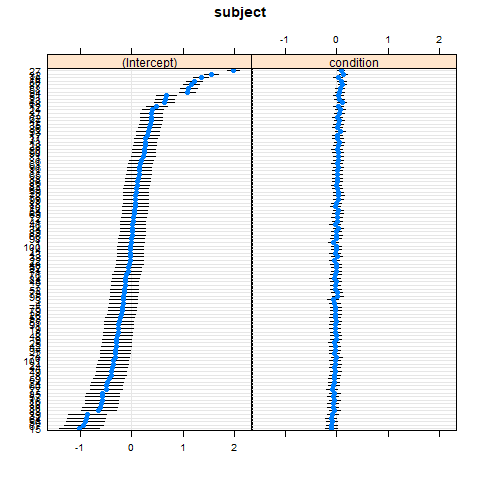

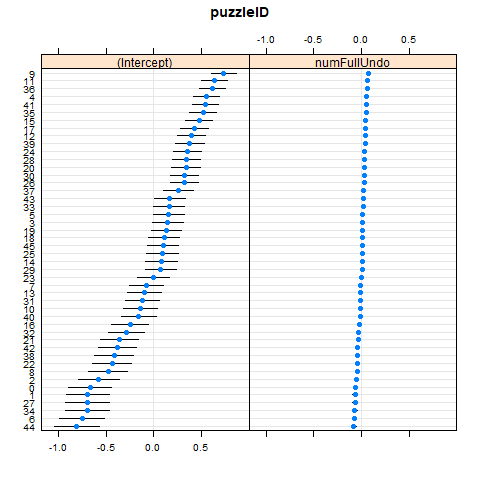

In [37]:
%%R

# theme_set(theme_sjplot())
# sjp.glmer(model2)
# plot_model(model2,type="pred",terms="condition")
# plot_model(model2,type="pred",terms="numFullUndo")
dotplot(ranef(model4,condVar=TRUE))


# -1 1 rather than facto

In [122]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [123]:
dat['numFullUndo_factor'][dat['numFullUndo_factor']==1] = -.5
dat['numFullUndo_factor'][dat['numFullUndo_factor']>=2] = .5

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
%%R -i dat
# dat$numFullUndo <- factor(dat$numFullUndo)
# dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [127]:
%%R
# this case 
model0 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+numFullUndo|subject)
               , data=dat,
             family=poisson())
model1_1 = glmer(num_loss ~ condition + numFullUndo_factor + (1 +numFullUndo |puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numFullUndo_factor + (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model2_1= glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1|subject)
               , data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numFullUndo_factor + (1+condition|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numFullUndo_factor + (1+numFullUndo|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model2)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) +  
    (1 + condition | subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19007.8  19057.7  -9496.9  18993.8     9285 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9395 -0.6508 -0.3371  0.4717  8.4800 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.278778 0.52799      
          condition   0.006124 0.07826  0.58
 puzzleID (Intercept) 0.196240 0.44299      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.47373    0.08506  -5.569 2.56e-08 ***
condition          -0.12484    0.01545  -8.082 6.39e-16 ***
numFullUndo_factor  0.08919    0.07038   1.267    0.205    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

In [128]:
%%R
model.matrix(model2)

     (Intercept) condition numFullUndo_factor
0              1         1               -0.5
1              1         1                0.5
2              1         1                0.0
3              1         1                0.0
4              1         1                0.0
5              1         1                0.0
6              1         1                0.5
7              1         1               -0.5
8              1         1                0.0
9              1         1                0.5
10             1         1                0.0
11             1         1                0.0
12             1         1                0.0
13             1         1                0.0
14             1         1               -0.5
15             1         1                0.5
16             1         1                0.0
17             1         1                0.5
18             1         1                0.0
19             1         1                0.0
20             1         1        

355            1         1                0.5
356            1         1                0.0
357            1         1                0.5
358            1         1                0.0
359            1         1                0.0
360            1         1                0.0
361            1         1                0.0
362            1         1                0.0
363            1         1               -0.5
364            1         1                0.0
365            1         1                0.0
366            1         1                0.0
367            1         1                0.0
368            1        -1                0.0
369            1        -1                0.0
370            1        -1                0.0
371            1        -1                0.0
372            1        -1                0.0
373            1        -1                0.0
374            1        -1                0.0
375            1        -1                0.0
376            1        -1        

711            1         1                0.0
712            1         1                0.0
713            1        -1                0.0
714            1        -1                0.0
715            1        -1                0.0
716            1        -1                0.0
717            1        -1                0.0
718            1        -1                0.0
719            1        -1                0.0
720            1        -1                0.0
721            1        -1                0.0
722            1        -1                0.0
723            1        -1                0.0
724            1        -1                0.0
725            1        -1                0.0
726            1        -1                0.0
727            1        -1                0.0
728            1        -1                0.0
729            1        -1                0.0
730            1        -1                0.0
731            1        -1                0.0
732            1        -1        

1067           1         1                0.0
1068           1         1                0.0
1069           1         1                0.0
1070           1         1                0.0
1071           1         1                0.0
1072           1         1                0.0
1073           1         1                0.0
1074           1         1                0.0
1075           1         1                0.0
1076           1         1                0.0
1077           1         1                0.0
1078           1         1                0.0
1079           1         1               -0.5
1080           1         1                0.0
1081           1        -1                0.0
1082           1        -1                0.0
1083           1        -1                0.0
1084           1        -1                0.0
1085           1        -1                0.0
1086           1        -1                0.0
1087           1        -1                0.0
1088           1        -1        

1990           1        -1                0.0
1991           1        -1                0.0
1992           1        -1                0.0
1993           1        -1                0.0
1994           1        -1                0.0
1995           1        -1                0.0
1996           1        -1                0.0
1997           1        -1                0.0
1998           1        -1                0.0
1999           1        -1                0.0
2000           1        -1                0.0
2001           1         1               -0.5
2002           1         1               -0.5
2003           1         1                0.0
2004           1         1                0.0
2005           1         1                0.0
2006           1         1                0.0
2007           1         1                0.0
2008           1         1               -0.5
2009           1         1                0.0
2010           1         1                0.0
2011           1         1        

2944           1         1                0.0
2945           1         1                0.5
2946           1         1                0.0
2947           1         1               -0.5
2948           1         1                0.0
2949           1         1                0.0
2950           1         1                0.0
2951           1         1                0.0
2952           1         1                0.0
2953           1         1               -0.5
2954           1         1               -0.5
2955           1         1                0.0
2956           1         1                0.0
2957           1         1                0.0
2958           1         1                0.0
2959           1         1                0.0
2960           1         1                0.0
2961           1         1                0.0
2962           1         1               -0.5
2963           1         1                0.0
2964           1         1               -0.5
2965           1         1        

3927           1         1                0.0
3928           1         1                0.0
3929           1         1                0.0
3930           1         1               -0.5
3931           1         1                0.0
3932           1         1                0.0
3933           1        -1                0.0
3934           1        -1                0.0
3935           1        -1                0.0
3936           1        -1                0.0
3937           1        -1                0.0
3938           1        -1                0.0
3939           1        -1                0.0
3940           1        -1                0.0
3941           1        -1                0.0
3942           1        -1                0.0
3943           1        -1                0.0
3944           1        -1                0.0
3945           1        -1                0.0
3946           1        -1                0.0
3947           1        -1                0.0
3948           1        -1        

4703           1         1                0.0
4704           1         1               -0.5
4705           1         1                0.0
4706           1         1                0.0
4707           1         1                0.0
4708           1         1                0.0
4709           1         1                0.0
4710           1         1                0.0
4711           1         1                0.0
4712           1         1                0.0
4713           1         1                0.0
4714           1         1                0.0
4932           1        -1                0.0
4933           1        -1                0.0
4934           1        -1                0.0
4935           1        -1                0.0
4936           1        -1                0.0
4937           1        -1                0.0
4938           1        -1                0.0
4939           1        -1                0.0
4940           1        -1                0.0
4941           1        -1        

5728           1        -1                0.0
5729           1        -1                0.0
5730           1        -1                0.0
5731           1        -1                0.0
5732           1        -1                0.0
5733           1        -1                0.0
5734           1        -1                0.0
5735           1        -1                0.0
5736           1        -1                0.0
5737           1        -1                0.0
5738           1        -1                0.0
5739           1        -1                0.0
5740           1        -1                0.0
5741           1        -1                0.0
5742           1        -1                0.0
5743           1        -1                0.0
5744           1        -1                0.0
5745           1        -1                0.0
5746           1        -1                0.0
5747           1        -1                0.0
5748           1        -1                0.0
5749           1        -1        

6702           1         1                0.0
6703           1         1                0.0
6704           1         1                0.0
6705           1         1                0.0
6706           1         1                0.0
6707           1         1                0.0
6708           1         1                0.0
6709           1         1                0.0
6710           1         1                0.0
6711           1         1                0.0
6712           1         1                0.0
6713           1         1                0.0
6714           1         1                0.0
6715           1         1                0.0
6716           1        -1                0.0
6717           1        -1                0.0
6718           1        -1                0.0
6719           1        -1                0.0
6720           1        -1                0.0
6721           1        -1                0.0
6722           1        -1                0.0
6723           1        -1        

7606           1        -1                0.0
7607           1        -1                0.0
7608           1        -1                0.0
7609           1        -1                0.0
7610           1        -1                0.0
7611           1        -1                0.0
7612           1        -1                0.0
7613           1         1               -0.5
7614           1         1                0.0
7615           1         1                0.0
7616           1         1                0.0
7617           1         1                0.0
7618           1         1                0.0
7619           1         1               -0.5
7620           1         1                0.0
7621           1         1                0.0
7622           1         1                0.0
7623           1         1                0.0
7624           1         1               -0.5
7625           1         1               -0.5
7626           1         1                0.0
7627           1         1        

8727           1         1                0.0
8728           1         1                0.0
8729           1         1                0.0
8730           1         1                0.0
8731           1         1                0.0
8732           1         1                0.0
8733           1         1                0.0
8734           1         1                0.0
8735           1         1                0.0
8736           1         1                0.0
8737           1         1                0.0
8738           1         1                0.0
8739           1         1                0.0
8740           1         1                0.0
8741           1         1                0.0
8742           1         1                0.0
8743           1         1                0.0
8744           1         1                0.0
8745           1         1                0.0
8746           1         1                0.0
8747           1         1                0.0
8748           1         1        

In [130]:
%%R
model1

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: num_loss ~ condition + numFullUndo_factor + (1 | puzzleID) +  
    (1 + numFullUndo | subject)
   Data: dat
      AIC       BIC    logLik  deviance  df.resid 
19024.858 19074.817 -9505.429 19010.858      9285 
Random effects:
 Groups   Name        Std.Dev. Corr
 subject  (Intercept) 0.51363      
          numFullUndo 0.02095  1.00
 puzzleID (Intercept) 0.44333      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46
Fixed Effects:
       (Intercept)           condition  numFullUndo_factor  
          -0.45569            -0.09909             0.09010  
optimizer (Nelder_Mead) convergence code: 0 (OK) ; 0 optimizer warnings; 1 lme4 warnings 


# ----

In [41]:
condition = (np.array(data_puzzle_level.condition)-0.5)*2
subject = np.array(data_puzzle_level.subjects)
puzzleID = np.array(data_puzzle_level.puzzleID)
numUndo = np.array(data_puzzle_level.numUNDO)
mas = np.array(data_puzzle_level.mas)
num_loss = np.array(data_puzzle_level.mas) - np.array(data_puzzle_level.numCities)
numFullUndo = np.array(data_puzzle_level.numFullUndo)
# numFullUndo = np.sign(numFullUndo)

dat = pd.DataFrame({'subject':subject, 'condition':condition,'mas':mas,
                    'num_loss':num_loss,'puzzleID':puzzleID,'numUndo':numUndo,
                   'numFullUndo':numFullUndo, 'numFullUndo_factor':numFullUndo})



# error correction
dat.mas[dat[dat.num_loss == -1 ].index] = 9
num_loss = np.array(dat.mas) - np.array(data_puzzle_level.numCities)
dat.num_loss = num_loss

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [42]:
dat['numFullUndo'][dat[dat['numFullUndo']<=1].index] = -1
dat['numFullUndo'][dat[dat['numFullUndo']==2].index] = 0
dat['numFullUndo'][dat[dat['numFullUndo']>2].index] = 1

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [33]:
dat['numFullUndo'][dat[dat['numFullUndo']==0].index] = -1
dat['numFullUndo'][dat[dat['numFullUndo']==1].index] = 0
dat['numFullUndo'][dat[dat['numFullUndo']>1].index] = 1

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
np.unique(dat['numFullUndo'])

array([-1,  0,  1], dtype=int64)

In [44]:
%%R -i dat

# dat$numFullUndo <- factor(dat$numFullUndo)
dat$numFullUndo_factor <- factor(dat$numFullUndo_factor)
dat$subject <- factor(dat$subject)
# dat$condition <- factor(dat$condition)
dat$puzzleID <- factor(dat$puzzleID)

In [45]:
%%R

model1 = glmer(num_loss ~ condition + numFullUndo +  (1|puzzleID) + (1+condition|subject)
               , data=dat,
             family=poisson())
summary(model1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
num_loss ~ condition + numFullUndo + (1 | puzzleID) + (1 + condition |  
    subject)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
 19009.4  19059.3  -9497.7  18995.4     9285 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9451 -0.6511 -0.3350  0.4746  8.2496 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 0.276627 0.52595      
          condition   0.006204 0.07877  0.56
 puzzleID (Intercept) 0.196102 0.44283      
Number of obs: 9292, groups:  subject, 101; puzzleID, 46

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.4743274  0.0934093  -5.078 3.82e-07 ***
condition   -0.1263262  0.0160958  -7.848 4.21e-15 ***
numFullUndo  0.0007654  0.0434437   0.018    0.986    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fix

In [ ]:
%%R

model1 = glmer(num_loss ~ condition + numUndo + (1|subject) + (1|puzzleID) + (0+condition|subject)
               , data=dat,
             family=poisson())
summary(model1)

In [ ]:
%%R

model1 = glmer(num_loss ~ condition + numFullUndo_factor + (1|subject) + (1|puzzleID) + (0+condition|subject)
               , data=dat,
             family=poisson())
summary(model1)

In [ ]:
%%R
model01 = glmer(num_loss ~ condition + numUndo +  (1|puzzleID)
               , data=dat,
             family=poisson())
model02 = glmer(num_loss ~ condition + numUndo +  (1|subject)
               , data=dat,
             family=poisson())
model00 = glmer(num_loss ~ condition + numUndo + (1|subject) + (1|puzzleID)
               , data=dat,
             family=poisson())
model1 = glmer(num_loss ~ condition + numUndo + (1+condition|subject) + (1|puzzleID)
               , data=dat,
             family=poisson())
model2 = glmer(num_loss ~ condition + numUndo + (1|subject) + (1+condition|puzzleID)
               ,  data=dat,
             family=poisson())
model3 = glmer(num_loss ~ condition + numUndo + (1+condition|subject) + (1+condition|puzzleID)
               ,  data=dat,
             family=poisson())
model4 = glmer(num_loss ~ condition + numUndo + (1+numUndo|subject) + (1|puzzleID)
               , data=dat,
             family=poisson())
model5 = glmer(num_loss ~ condition + numUndo + (1|subject) + (1+numUndo|puzzleID)
               ,  data=dat,
            family=poisson())
model6 = glmer(num_loss ~ condition + numUndo + (1+numUndo|subject) + (1+numUndo|puzzleID)
               ,  data=dat,
            family=poisson())
model7 = glmer(num_loss ~ condition + numUndo + (1+condition+numUndo|subject) + (1+numUndo|puzzleID)
               ,  data=dat,
            family=poisson())
model8 = glmer(num_loss ~ condition + numUndo + (1+condition+numUndo|subject) + (1+condition+numUndo|puzzleID)
               ,  data=dat,
            family=poisson())


summary(model8)